## Project Name: House Prices: Advanced Regression Techniques

##### Problem Statement ##############

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement
 ceiling or the proximity to an east-west railroad.But this playground competition's dataset proves that 
much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, 
this competition challenges you to predict the final price of each home.


**The main aim of this project is to predict the house price based on various features which we will discuss as we go ahead**

#### Dataset to downloaded from the below link
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.pandas.set_option('display.max_columns', None)

In [2]:
train = pd.read_csv("train.csv")


In [3]:
test = pd.read_csv("test.csv")

In [4]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [5]:
train.shape

(1460, 81)

In [6]:
test.shape

(1459, 80)

In [7]:
train.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1455          2000     Gable  CompShg     VinylSd     VinylSd       None   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd       None   
1458          1996       Hip  CompShg     MetalSd     MetalSd       None   
1459          1965     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1455         0.0        TA        TA      PConc       Gd       TA   
1456       119.0        TA        TA     CBlock       Gd       TA   
1457         0.0        Ex        Gd      Stone       TA       Gd   
1458         0.0        TA        TA     CBlock       TA       TA   
1459         0.0        Gd        TA     CBlock       TA       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1455           No          Unf           0          Unf           0   
1456           No          ALQ         790          Rec         163   
1457           No          GLQ         275          Unf           0   
1458           Mn          GLQ          49          Rec        1029   
1459           No          BLQ         830          LwQ         290   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1455        953          953    GasA        Ex          Y      SBrkr   
1456        589         1542    GasA        TA          Y      SBrkr   
1457        877         1152    GasA        Ex          Y      SBrkr   
1458          0         1078    GasA        Gd          Y      FuseA   
1459        136         1256    GasA        Gd          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1455       953       694             0       1647             0             0   
1456      2073         0             0       2073             1             0   
1457      1188      1152             0       2340             0             0   
1458      1078         0             0       1078             1             0   
1459      1256         0             0       1256             1             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1455         2         1             3             1          TA   
1456         2         0             3             1          TA   
1457         2         0             4             1          Gd   
1458         1         0             2             1          Gd   
1459         1         1             3             1          TA   

   

# EDA and Feature Engineering for training data

In [8]:
duplicate_train = train[train.duplicated()]
print(duplicate_train)

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [11]:
train.drop("Id", axis=1, inplace= True)

### Handling Numerical Missing values

**1.Continuous**

In [12]:
missing_continuous = []
for i in train.columns:
    if train[i].dtype !="object" and len(train[i].unique())>20:
        missing_continuous.append(i)
missing_continuous

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'MiscVal',
 'SalePrice']

In [13]:
for i in missing_continuous:
    print(i, round(train[i].isnull().mean(), 3)*100)

LotFrontage 17.7
LotArea 0.0
YearBuilt 0.0
YearRemodAdd 0.0
MasVnrArea 0.5
BsmtFinSF1 0.0
BsmtFinSF2 0.0
BsmtUnfSF 0.0
TotalBsmtSF 0.0
1stFlrSF 0.0
2ndFlrSF 0.0
LowQualFinSF 0.0
GrLivArea 0.0
GarageYrBlt 5.5
GarageArea 0.0
WoodDeckSF 0.0
OpenPorchSF 0.0
EnclosedPorch 0.0
ScreenPorch 0.0
MiscVal 0.0
SalePrice 0.0


In [14]:
train["LotFrontage"].fillna(train["LotFrontage"].mean(), inplace= True)
train["MasVnrArea"].fillna(train["MasVnrArea"].median(), inplace= True)
train["GarageYrBlt"].fillna(train["GarageYrBlt"].mean(), inplace= True)

In [15]:
for i in missing_continuous:
    print(i, round(train[i].isnull().mean(), 3)*100)

LotFrontage 0.0
LotArea 0.0
YearBuilt 0.0
YearRemodAdd 0.0
MasVnrArea 0.0
BsmtFinSF1 0.0
BsmtFinSF2 0.0
BsmtUnfSF 0.0
TotalBsmtSF 0.0
1stFlrSF 0.0
2ndFlrSF 0.0
LowQualFinSF 0.0
GrLivArea 0.0
GarageYrBlt 0.0
GarageArea 0.0
WoodDeckSF 0.0
OpenPorchSF 0.0
EnclosedPorch 0.0
ScreenPorch 0.0
MiscVal 0.0
SalePrice 0.0


**2.Discrete**

In [16]:
missing_discrete = []
for i in train.columns:
    if train[i].dtype !="object" and len(train[i].unique())<=20:
        missing_discrete.append(i)
len(missing_discrete)

16

In [17]:
for i in missing_discrete:
    print(i, round(train[i].isnull().mean(), 4)*100)

MSSubClass 0.0
OverallQual 0.0
OverallCond 0.0
BsmtFullBath 0.0
BsmtHalfBath 0.0
FullBath 0.0
HalfBath 0.0
BedroomAbvGr 0.0
KitchenAbvGr 0.0
TotRmsAbvGrd 0.0
Fireplaces 0.0
GarageCars 0.0
3SsnPorch 0.0
PoolArea 0.0
MoSold 0.0
YrSold 0.0


In [18]:
# for i in missing_discrete:
#     train[i].fillna(train[i].mode()[0], inplace = True)

### Handling Categorical Missing values

In [19]:
missing_categorical = []
for i in train.columns:
    if train[i].dtype == 'O' and train[i].isnull().sum() > 0:
        missing_categorical.append(i)
print(missing_categorical)
        

['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [20]:
for i in missing_categorical:
    print(i, round(train[i].isnull().mean(),4)*100)

Alley 93.77
MasVnrType 0.5499999999999999
BsmtQual 2.53
BsmtCond 2.53
BsmtExposure 2.6
BsmtFinType1 2.53
BsmtFinType2 2.6
Electrical 0.06999999999999999
FireplaceQu 47.260000000000005
GarageType 5.55
GarageFinish 5.55
GarageQual 5.55
GarageCond 5.55
PoolQC 99.52
Fence 80.75
MiscFeature 96.3


In [21]:
for i in missing_categorical:
    if i not in ["Alley", "FireplaceQu", "PoolQC", "Fence", "MiscFeature"]:
        train[i].fillna(train[i].mode()[0], inplace=True)
        print(i, round(train[i].isnull().mean(),4)*100)
    else:
        continue

MasVnrType 0.0
BsmtQual 0.0
BsmtCond 0.0
BsmtExposure 0.0
BsmtFinType1 0.0
BsmtFinType2 0.0
Electrical 0.0
GarageType 0.0
GarageFinish 0.0
GarageQual 0.0
GarageCond 0.0


In [22]:
train.drop(["Alley", "FireplaceQu", "PoolQC", "Fence", "MiscFeature"],axis = 1, inplace = True)

In [23]:
train.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 75, dtype: int64

### Handling Year Feature

In [24]:
year = []
for i in train.columns:
    if "Yr" in i or "Year" in i:
        year.append(i)
year

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

Text(0.5, 1.0, 'House Price vs YearSold')

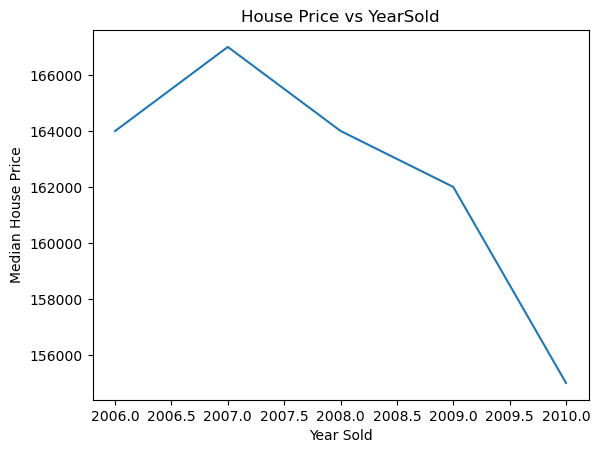

In [25]:
train.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title("House Price vs YearSold")

In [26]:
for i in year:
    train[i] = train['YrSold'] - train[i]

In [27]:
train.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL         65.0     8450   Pave      Reg         Lvl   
1          20       RL         80.0     9600   Pave      Reg         Lvl   
2          60       RL         68.0    11250   Pave      IR1         Lvl   
3          70       RL         60.0     9550   Pave      IR1         Lvl   
4          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5          5             5     Gable   
1     1Story            6            8         31            31     Gable   
2     2Story            7            5          7             6     Gable   
3     2Story            7            5         91            36     Gable   
4     2Story            8            5          8             8     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1  CompShg     MetalSd     MetalSd       None         0.0        TA        TA   
2  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        150          856    GasA        Ex   
1          Unf           0        284         1262    GasA        Ex   
2          Unf           0        434          920    GasA        Ex   
3          Unf           0        540          756    GasA        Gd   
4          Unf           0        490         1145    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  GarageYrBlt  \
0          Gd             8        Typ           0     Attchd          5.0   
1          TA             6        Typ           1     Attchd         31.0   
2          Gd             6        Typ           1     Attchd          7.0   
3          Gd          

In [28]:
train.drop('YrSold', axis=1, inplace = True)

In [29]:
train.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL         65.0     8450   Pave      Reg         Lvl   
1          20       RL         80.0     9600   Pave      Reg         Lvl   
2          60       RL         68.0    11250   Pave      IR1         Lvl   
3          70       RL         60.0     9550   Pave      IR1         Lvl   
4          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5          5             5     Gable   
1     1Story            6            8         31            31     Gable   
2     2Story            7            5          7             6     Gable   
3     2Story            7            5         91            36     Gable   
4     2Story            8            5          8             8     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1  CompShg     MetalSd     MetalSd       None         0.0        TA        TA   
2  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        150          856    GasA        Ex   
1          Unf           0        284         1262    GasA        Ex   
2          Unf           0        434          920    GasA        Ex   
3          Unf           0        540          756    GasA        Gd   
4          Unf           0        490         1145    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  GarageYrBlt  \
0          Gd             8        Typ           0     Attchd          5.0   
1          TA             6        Typ           1     Attchd         31.0   
2          Gd             6        Typ           1     Attchd          7.0   
3          Gd          

### Handling Continuous Features

In [30]:
continuous = []
for i in train.columns:
     if train[i].dtype != "O" and len(train[i].unique())>20  and i not in year:
            continuous.append(i)
continuous         

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'MiscVal',
 'SalePrice']

C:\Users\TAHSEEN\AppData\Local\Temp\ipykernel_4772\969805410.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data[i])


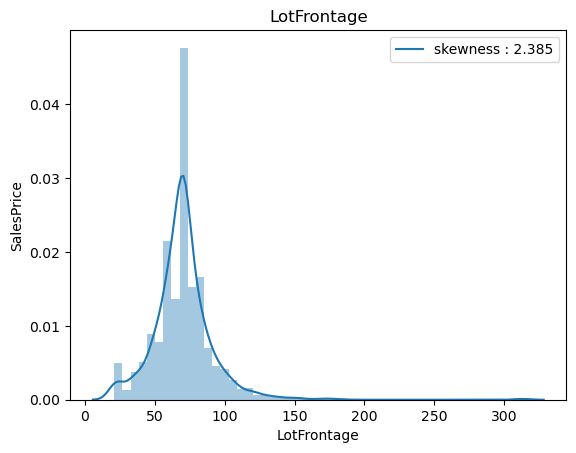

C:\Users\TAHSEEN\AppData\Local\Temp\ipykernel_4772\969805410.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data[i])


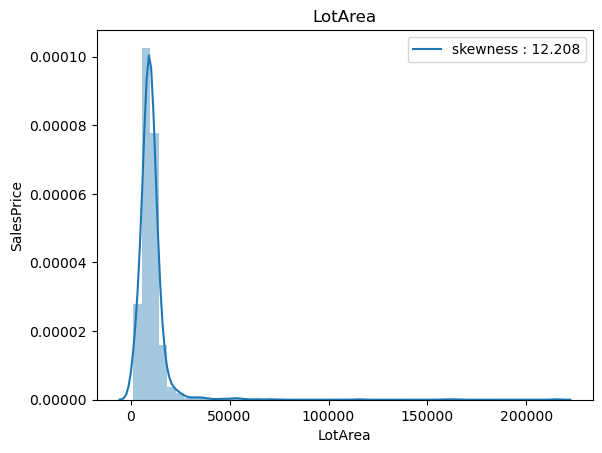

C:\Users\TAHSEEN\AppData\Local\Temp\ipykernel_4772\969805410.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data[i])


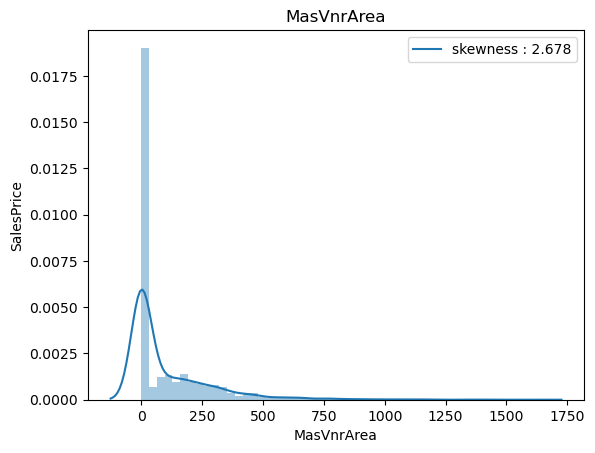

C:\Users\TAHSEEN\AppData\Local\Temp\ipykernel_4772\969805410.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data[i])


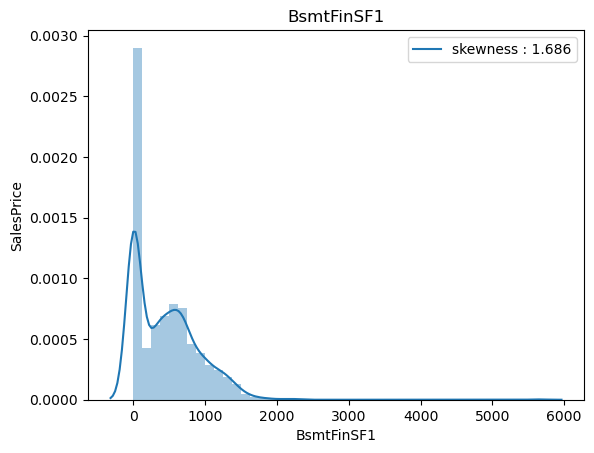

C:\Users\TAHSEEN\AppData\Local\Temp\ipykernel_4772\969805410.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data[i])


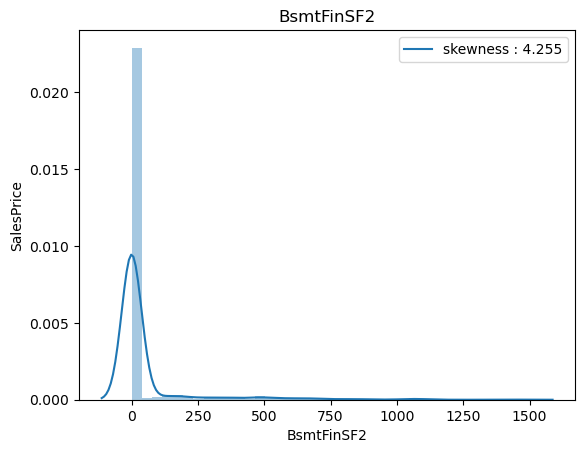

C:\Users\TAHSEEN\AppData\Local\Temp\ipykernel_4772\969805410.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data[i])


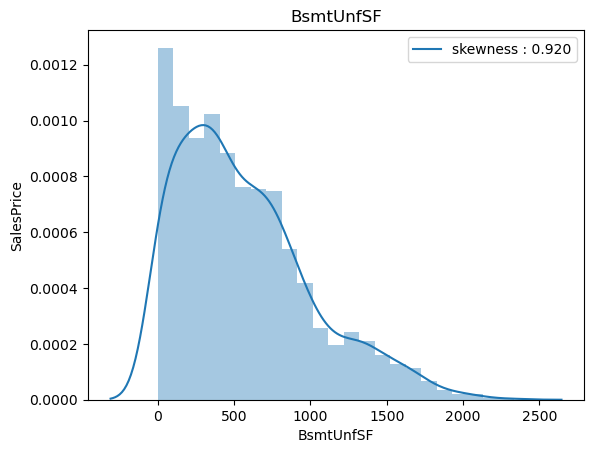

C:\Users\TAHSEEN\AppData\Local\Temp\ipykernel_4772\969805410.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data[i])


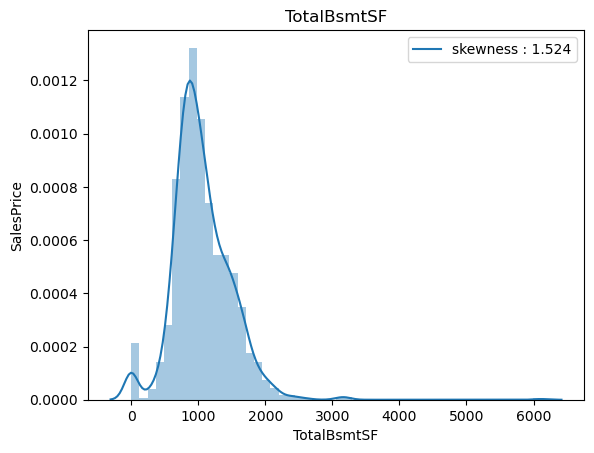

C:\Users\TAHSEEN\AppData\Local\Temp\ipykernel_4772\969805410.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data[i])


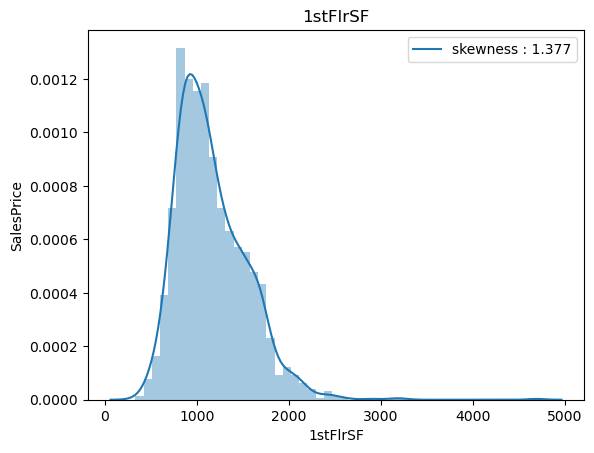

C:\Users\TAHSEEN\AppData\Local\Temp\ipykernel_4772\969805410.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data[i])


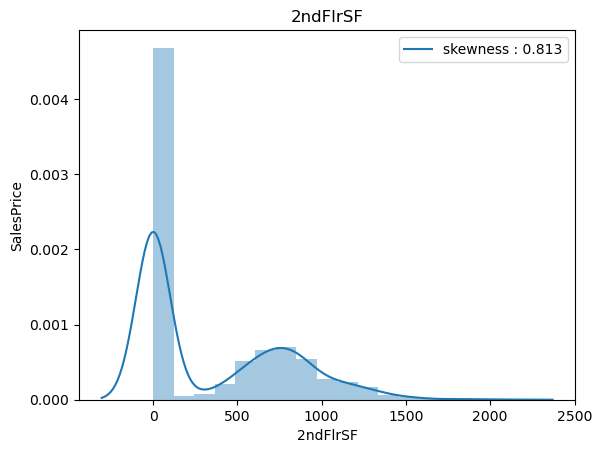

C:\Users\TAHSEEN\AppData\Local\Temp\ipykernel_4772\969805410.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data[i])


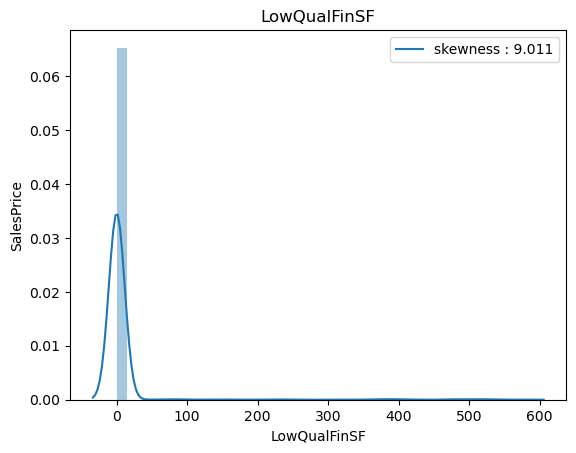

C:\Users\TAHSEEN\AppData\Local\Temp\ipykernel_4772\969805410.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data[i])


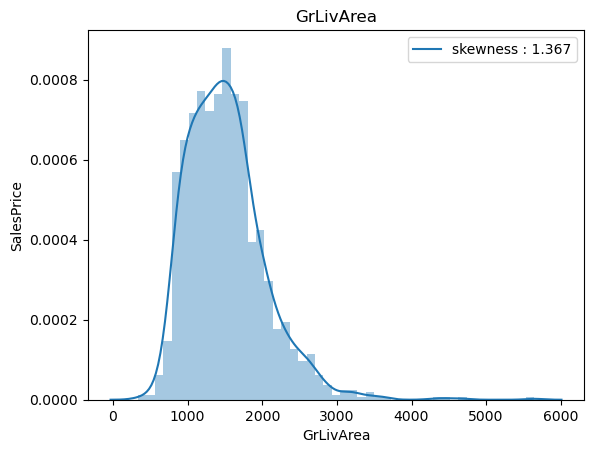

C:\Users\TAHSEEN\AppData\Local\Temp\ipykernel_4772\969805410.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data[i])


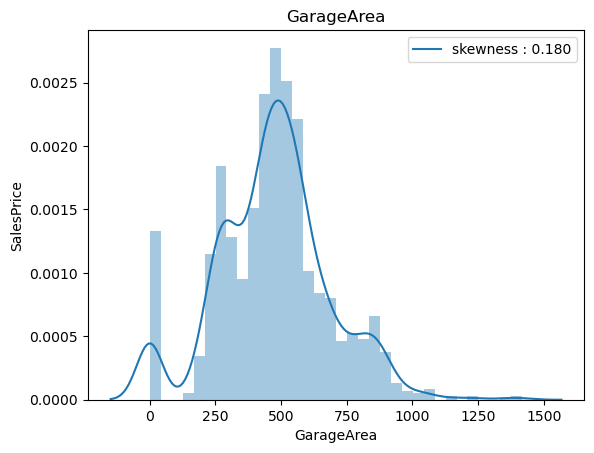

C:\Users\TAHSEEN\AppData\Local\Temp\ipykernel_4772\969805410.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data[i])


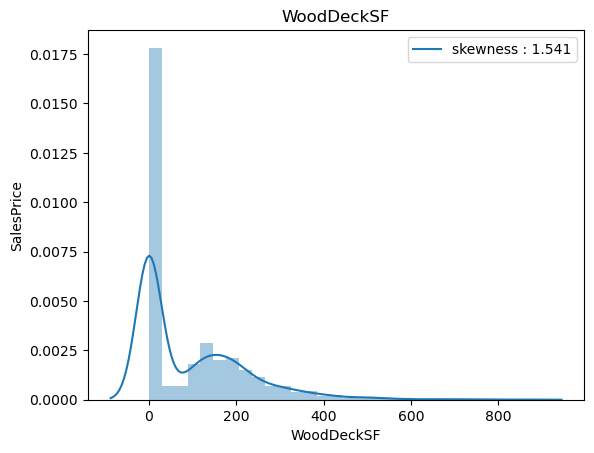

C:\Users\TAHSEEN\AppData\Local\Temp\ipykernel_4772\969805410.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data[i])


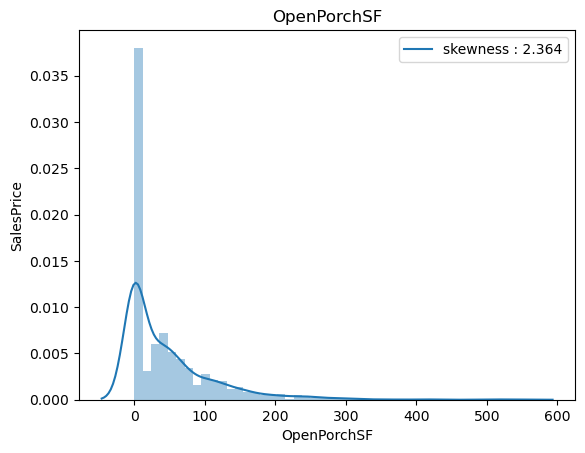

C:\Users\TAHSEEN\AppData\Local\Temp\ipykernel_4772\969805410.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data[i])


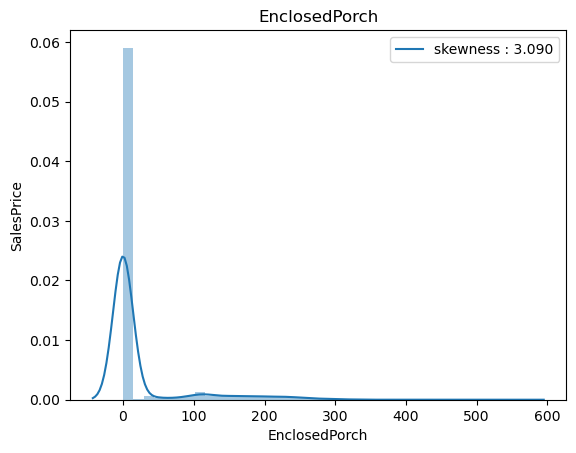

C:\Users\TAHSEEN\AppData\Local\Temp\ipykernel_4772\969805410.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data[i])


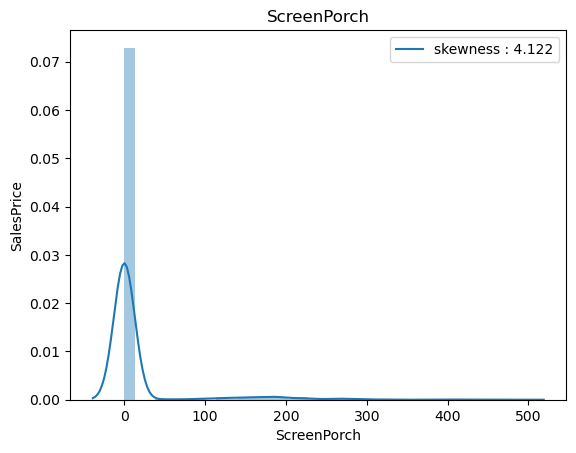

C:\Users\TAHSEEN\AppData\Local\Temp\ipykernel_4772\969805410.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data[i])


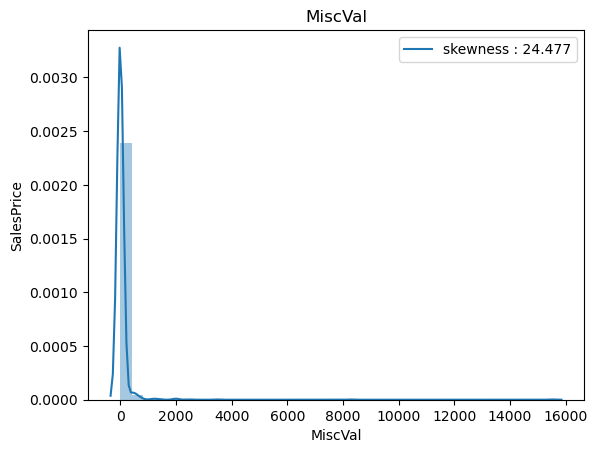

C:\Users\TAHSEEN\AppData\Local\Temp\ipykernel_4772\969805410.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data[i])


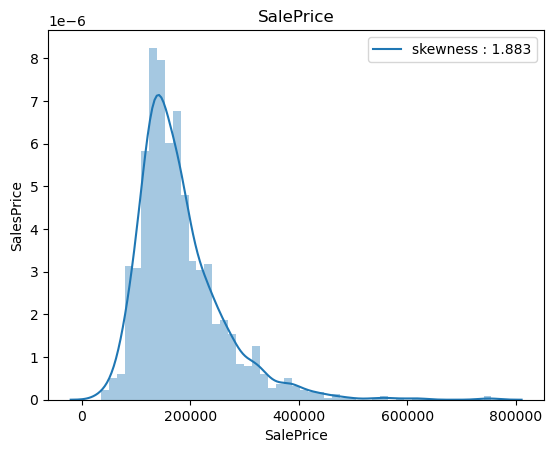

In [31]:
for i in continuous:
    data = train.copy()
    ax = sns.distplot(data[i])
    ax.legend(["skewness : {:0.3f}".format(data[i].skew())])
    plt.xlabel(i)
    plt.ylabel('SalesPrice')
    plt.title(i)
    plt.show() 

In [32]:
skew=[]
for i in continuous:
    if abs(train[i].skew())>1:
        skew.append(i)
skew

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'TotalBsmtSF',
 '1stFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'MiscVal',
 'SalePrice']

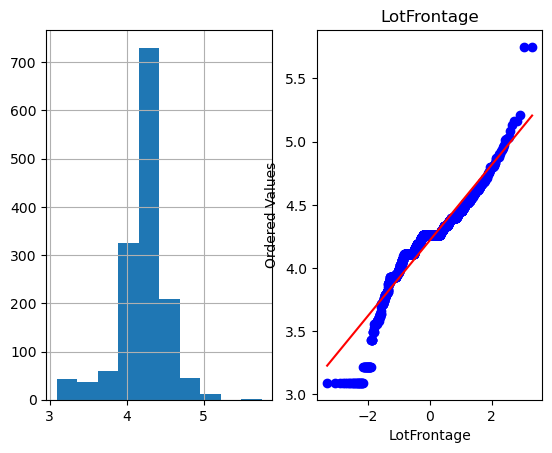

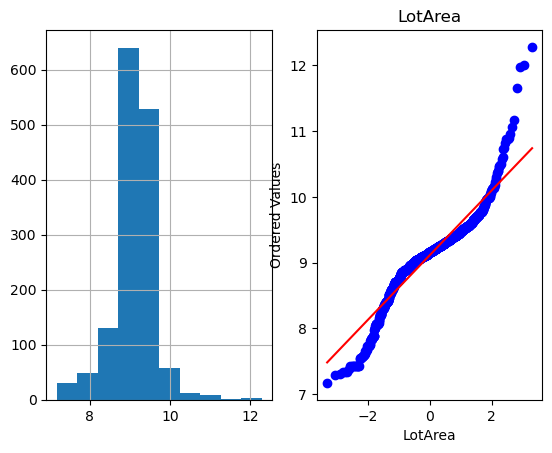

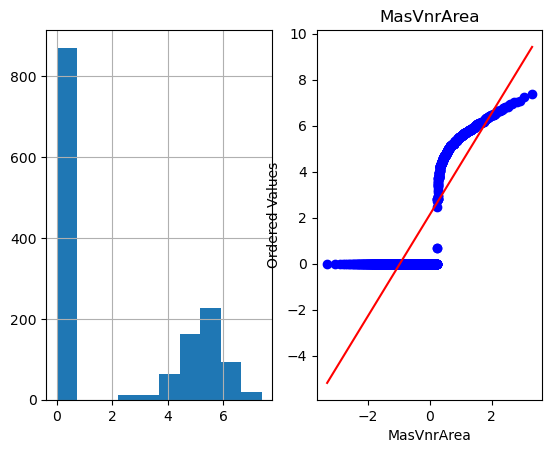

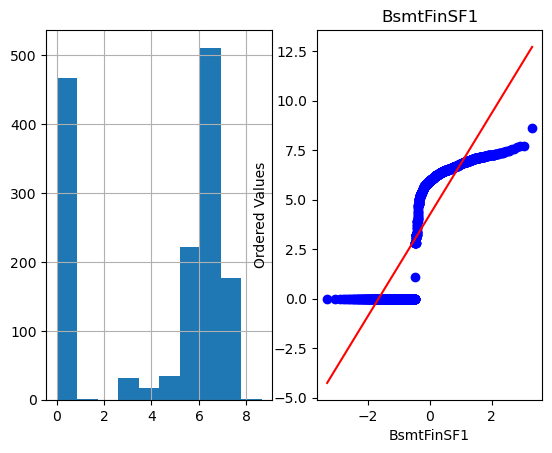

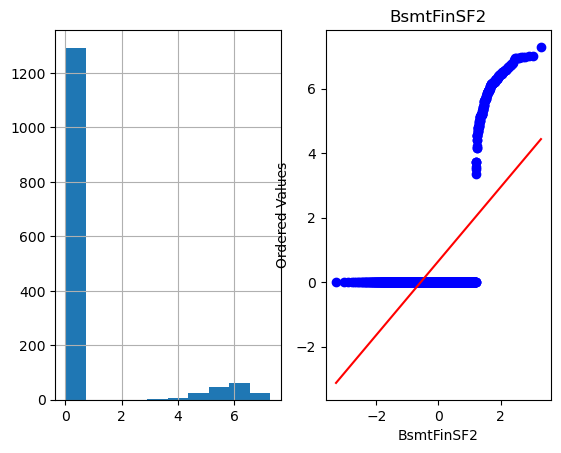

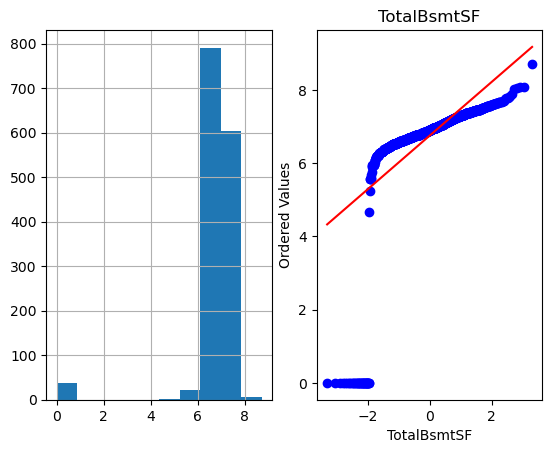

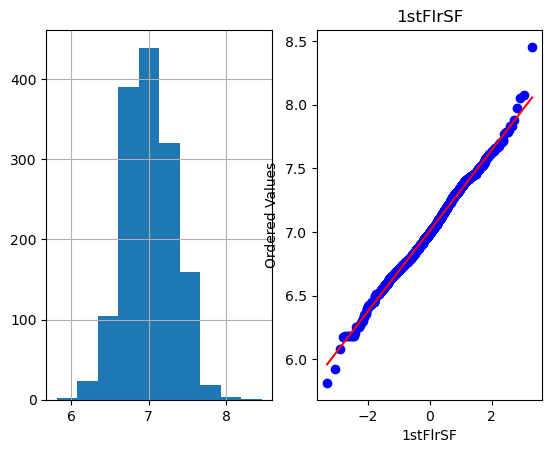

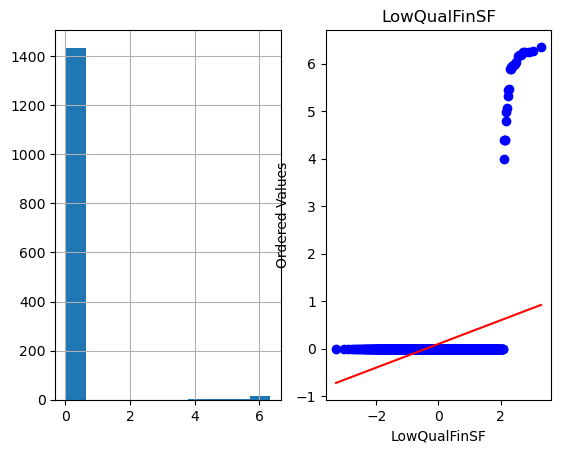

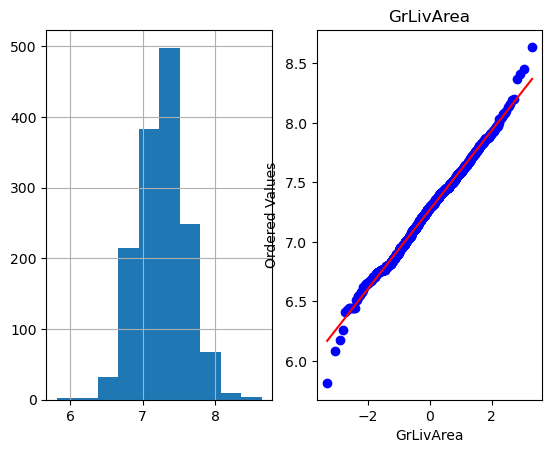

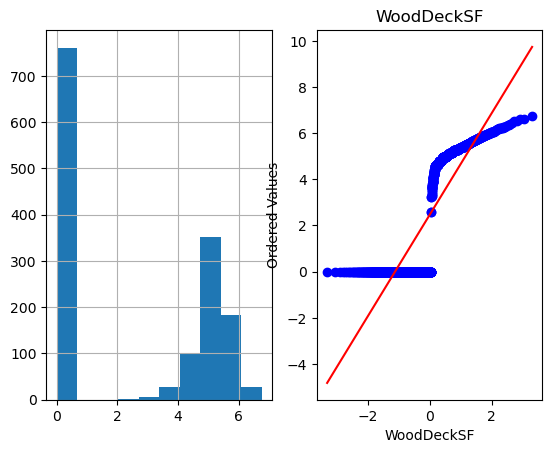

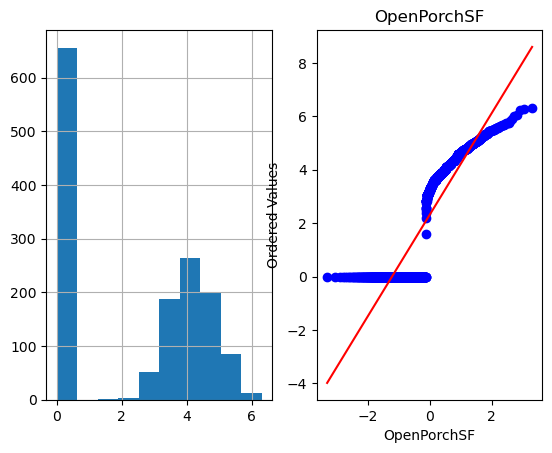

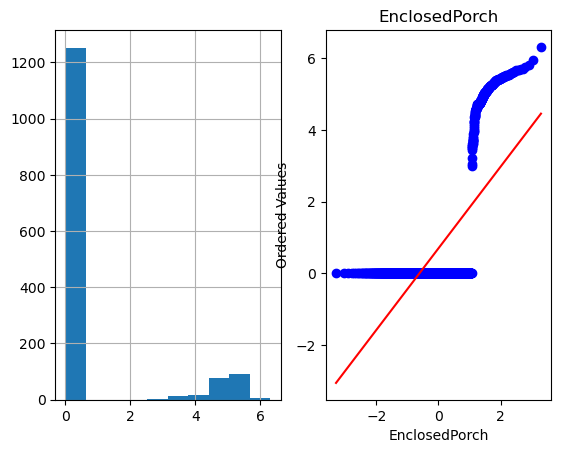

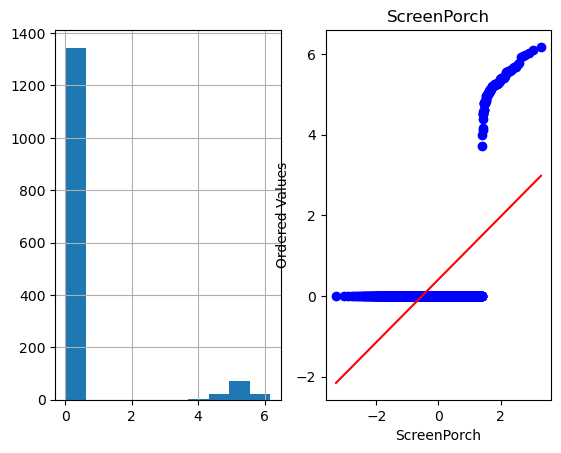

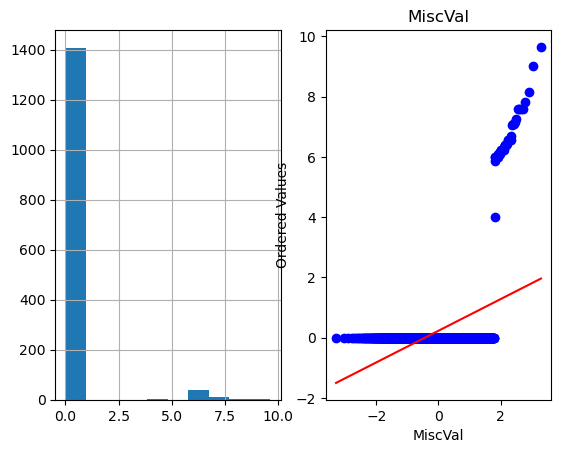

In [33]:
## Q-Q plot
import pylab
import scipy.stats as stat
for i in skew:
    if i == 'SalePrice':
        pass
    else:
        data = np.log1p(train[i])
        plt.subplot(1,2,1)
        data.hist()
        plt.subplot(1,2,2)
        stat.probplot(data,dist='norm',plot=pylab)
        plt.xlabel(i)
        plt.title(i)
        plt.show()

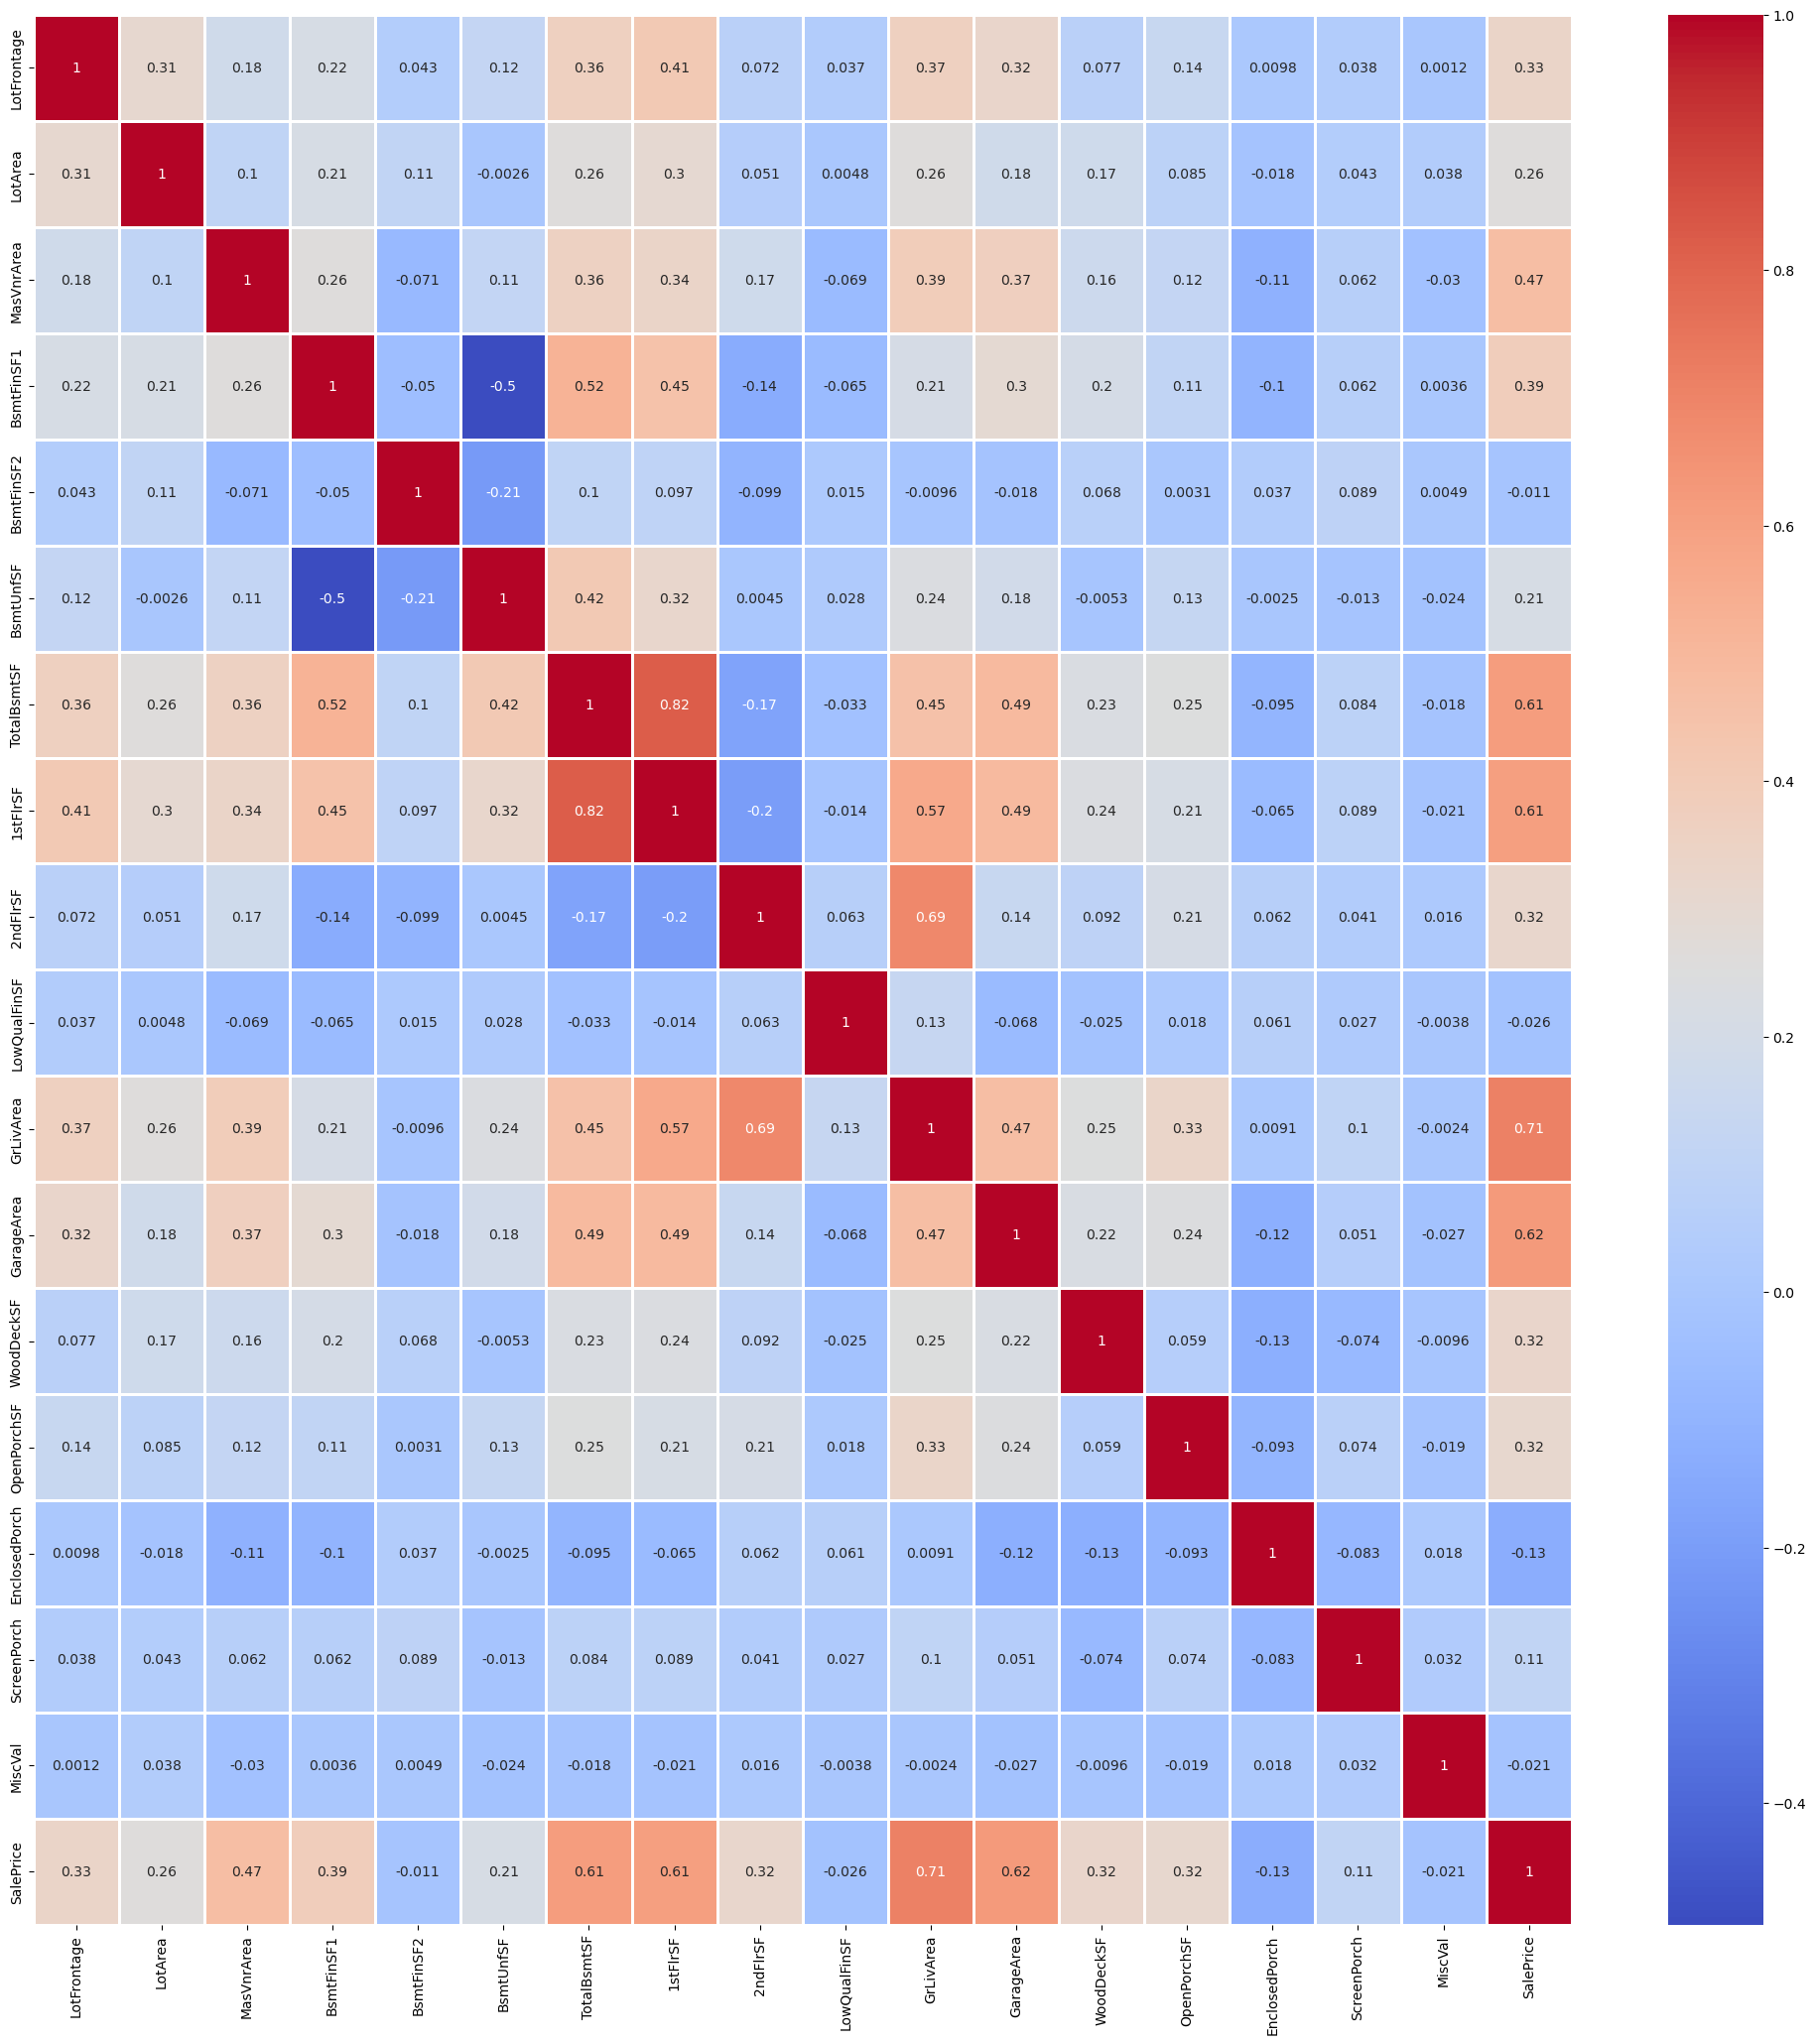

In [34]:
## Correlation map
plt.figure(figsize=(25,25))
ax = sns.heatmap(train[continuous].corr(), cmap = "coolwarm", annot=True, linewidth = 2)

In [35]:
# correlation heatmap of higly correlated features with SalePrice
low_corr = train[continuous].corr()
low_corr_features = low_corr.index[low_corr["SalePrice"] < 0.10]
low_corr_features

Index(['BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch', 'MiscVal'], dtype='object')

In [36]:
train.drop(low_corr_features, axis =1, inplace =True)

In [37]:
train.shape

(1460, 70)

### Handling Categorical Feature 

In [38]:
categorical = [i for i in train.columns if train[i].dtype=='object']
categorical

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [39]:
len(categorical)

38

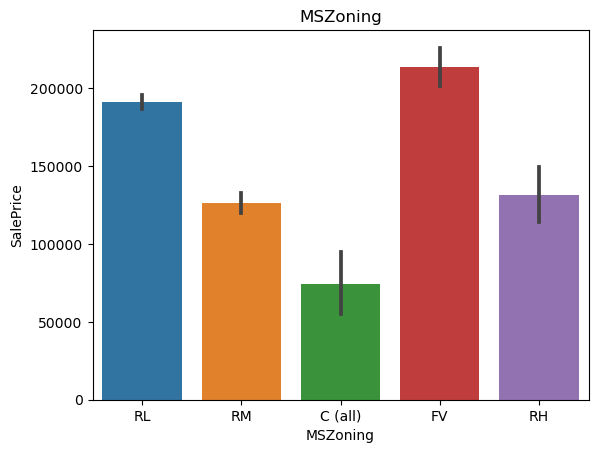

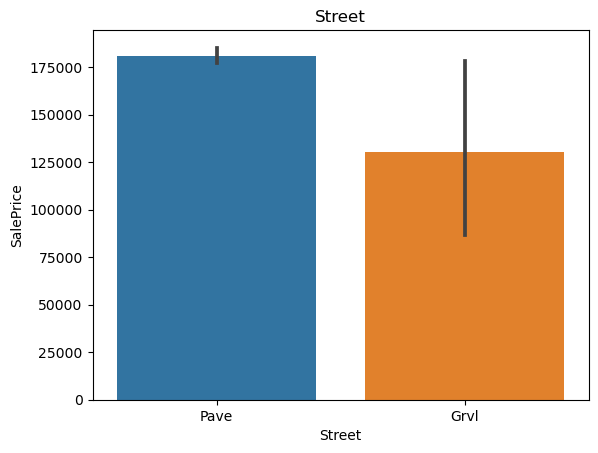

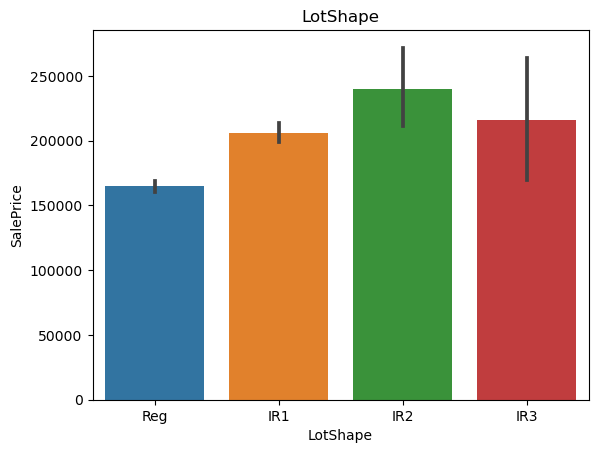

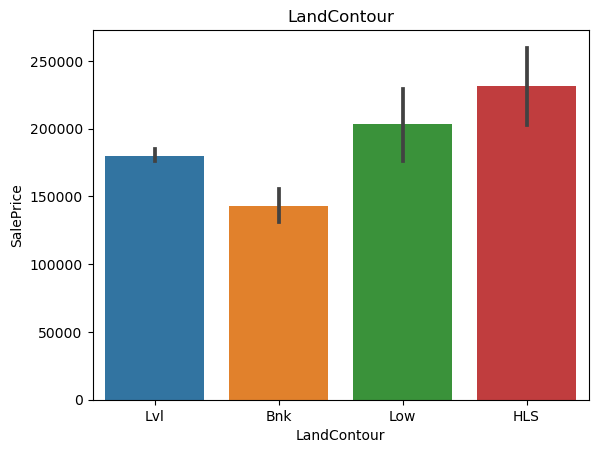

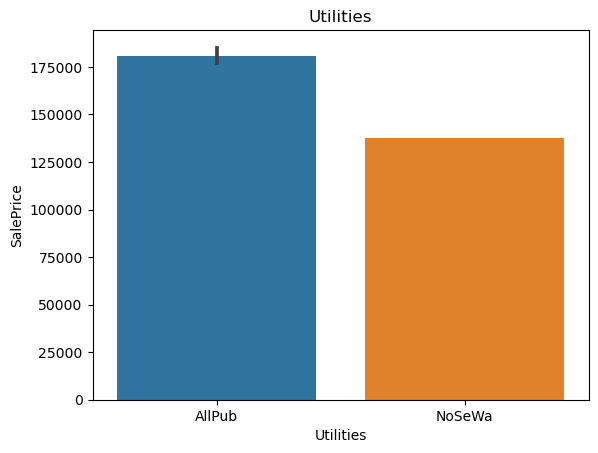

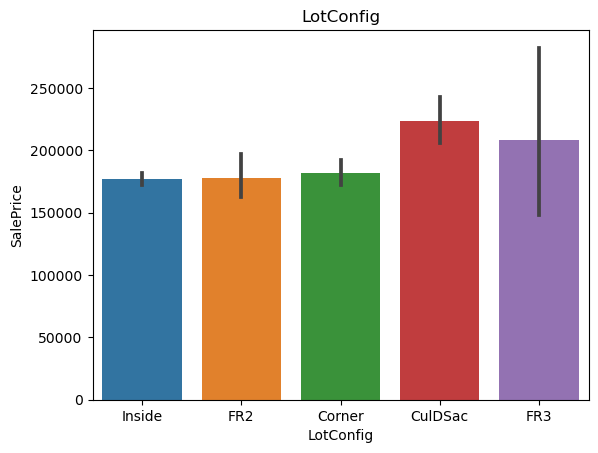

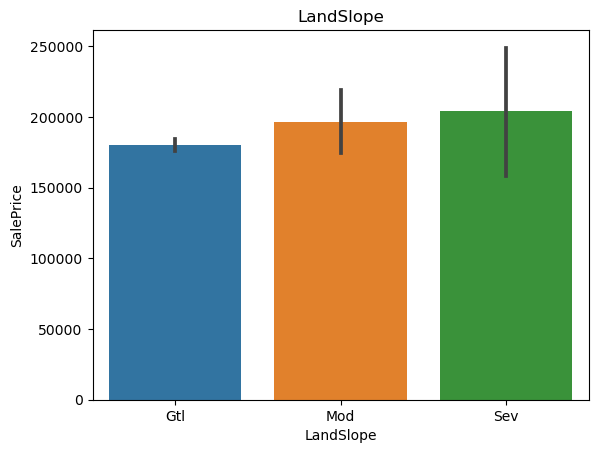

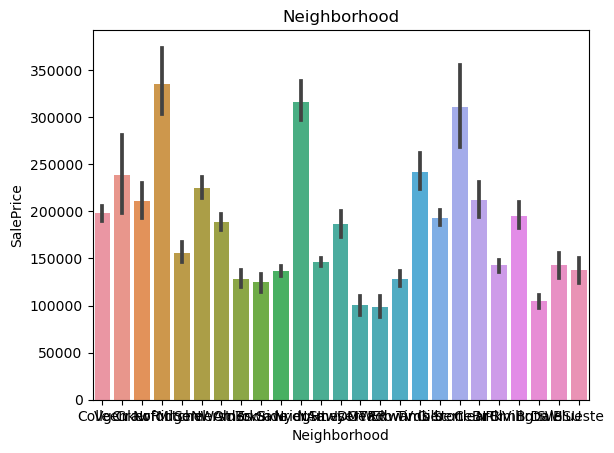

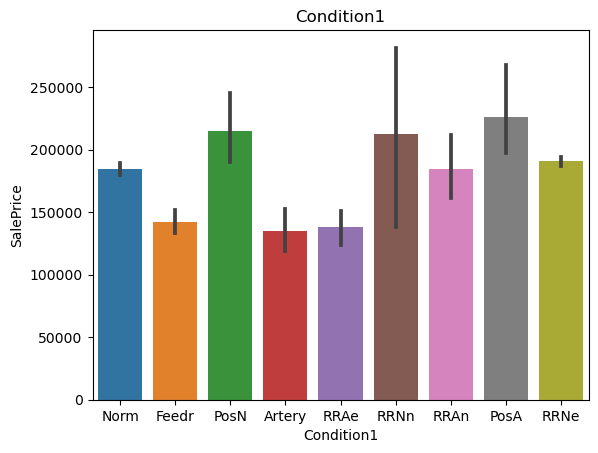

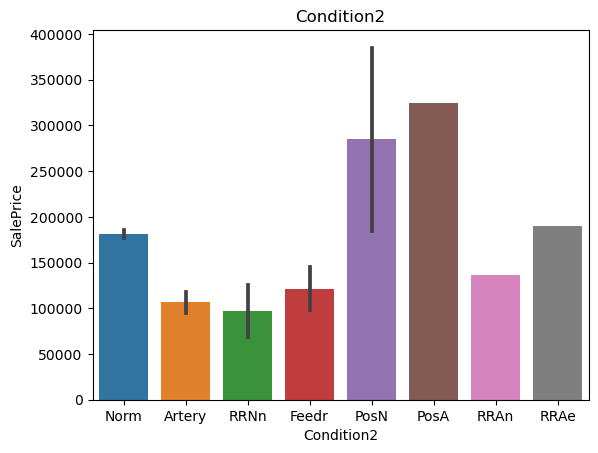

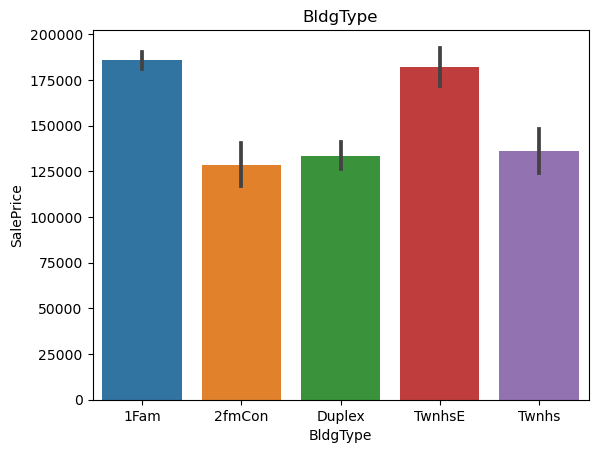

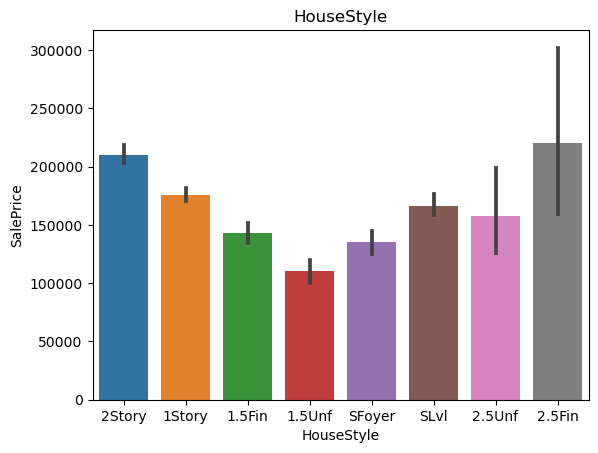

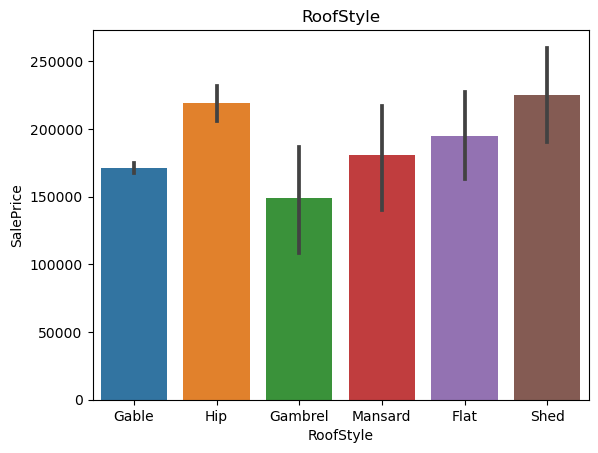

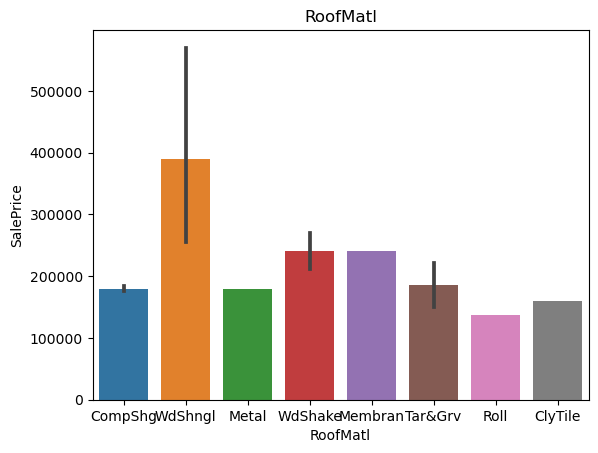

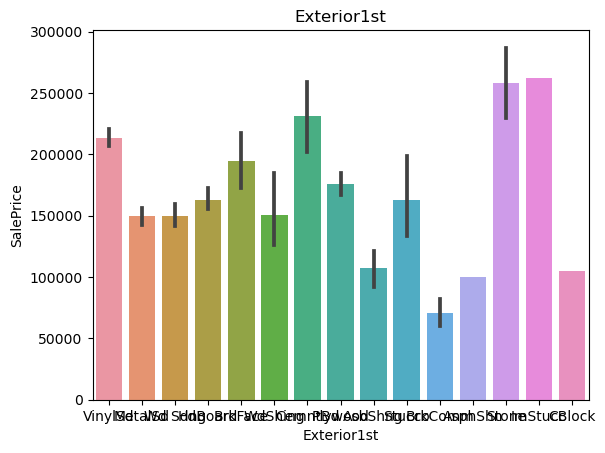

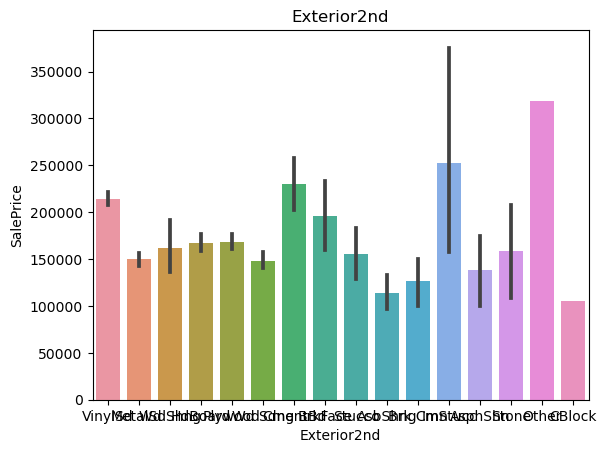

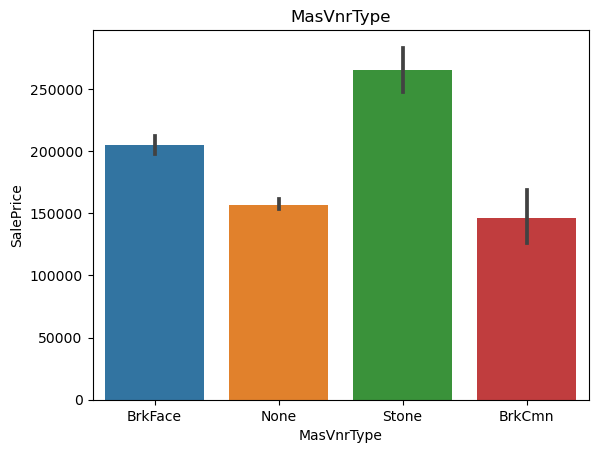

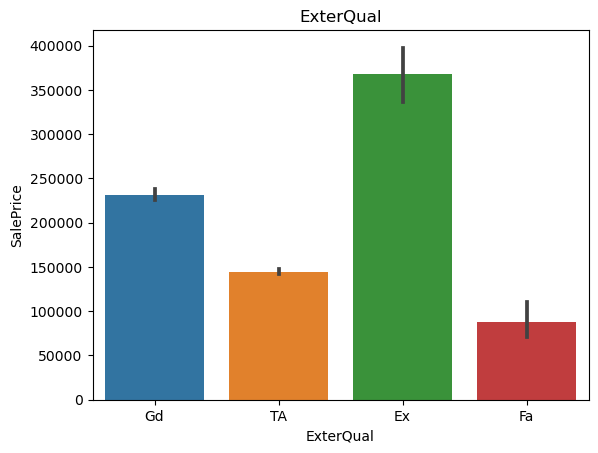

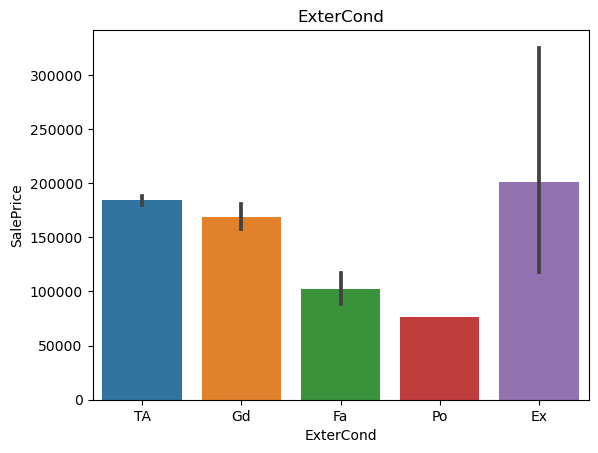

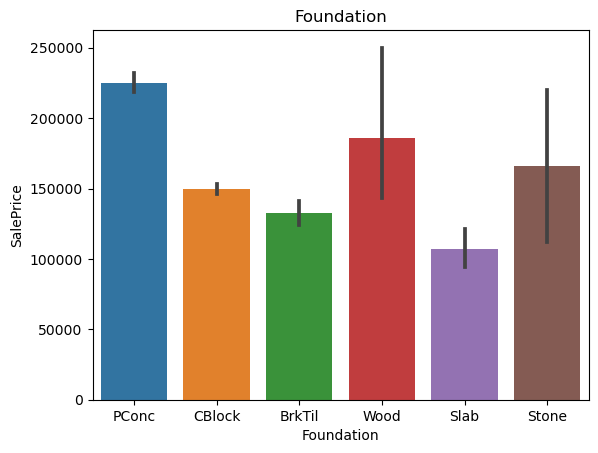

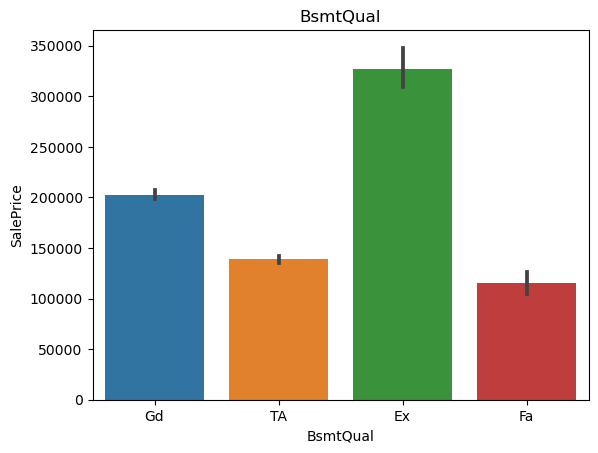

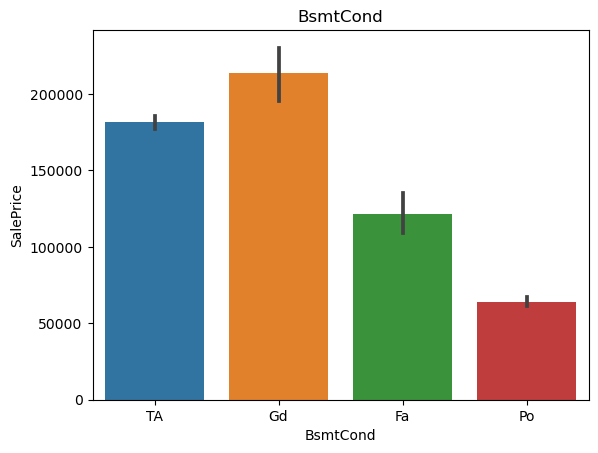

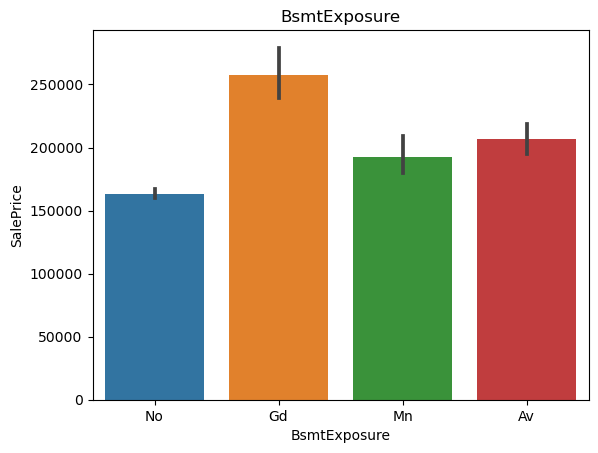

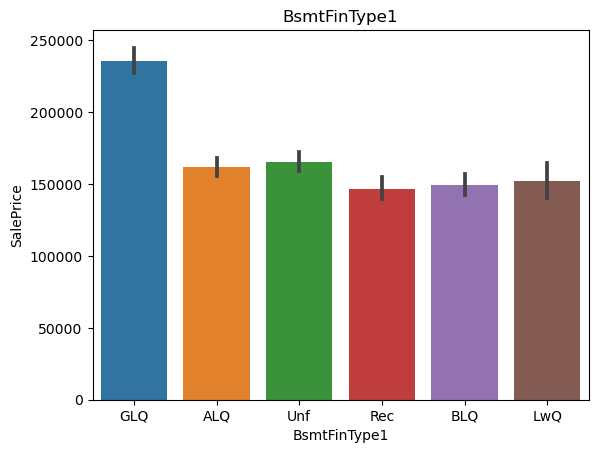

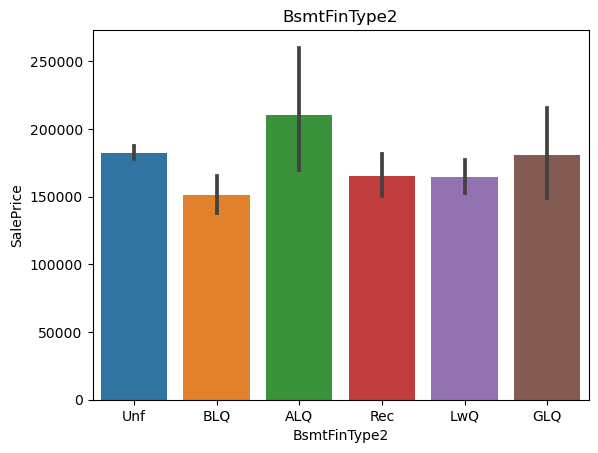

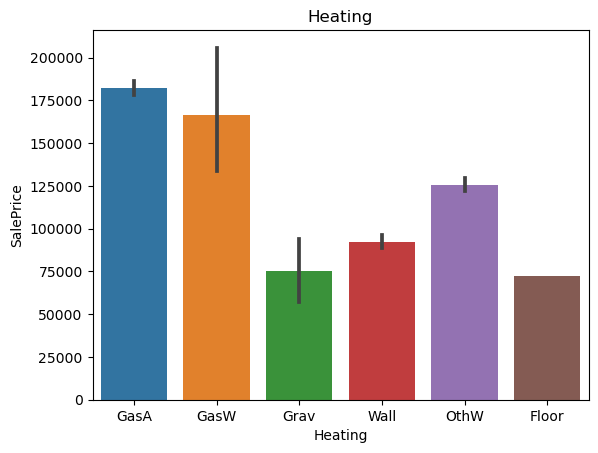

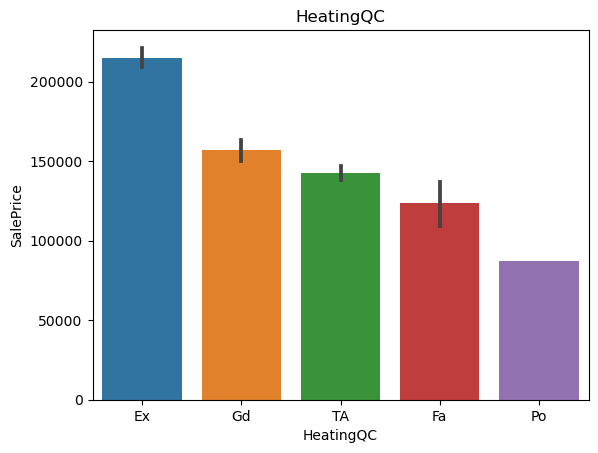

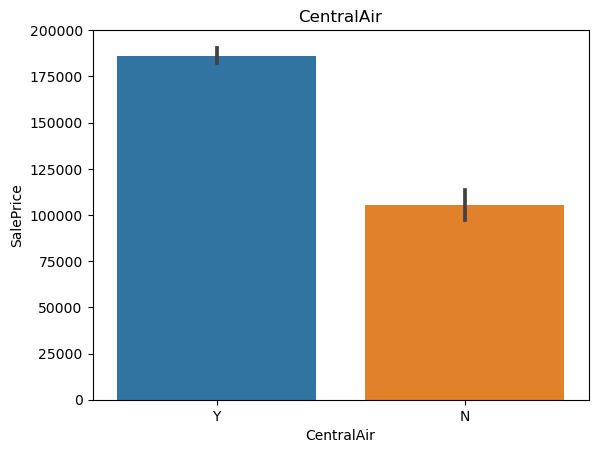

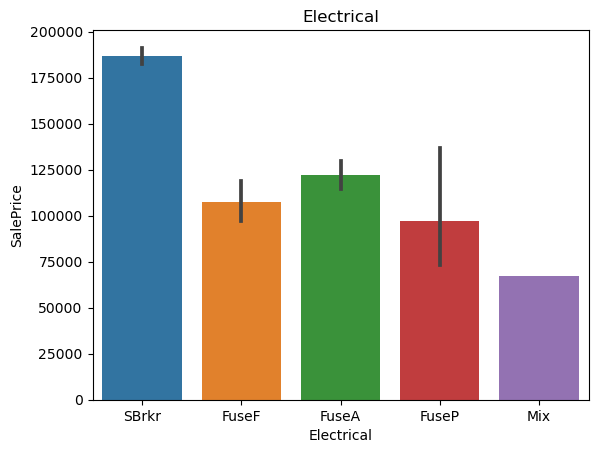

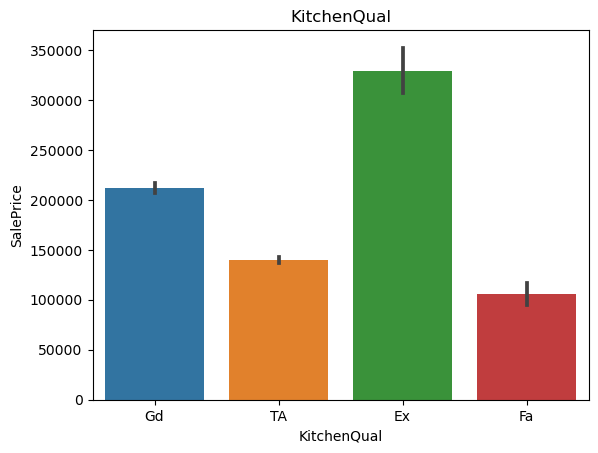

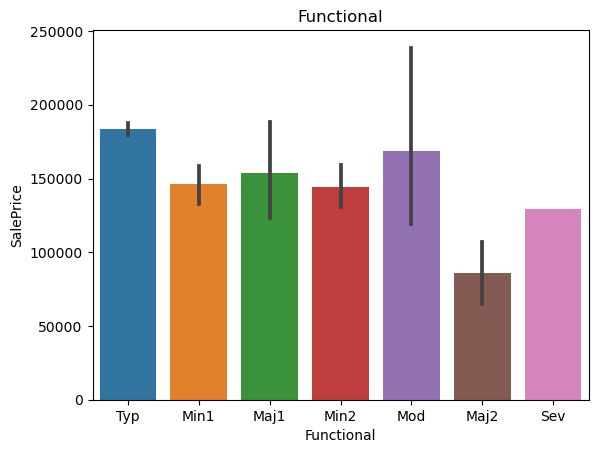

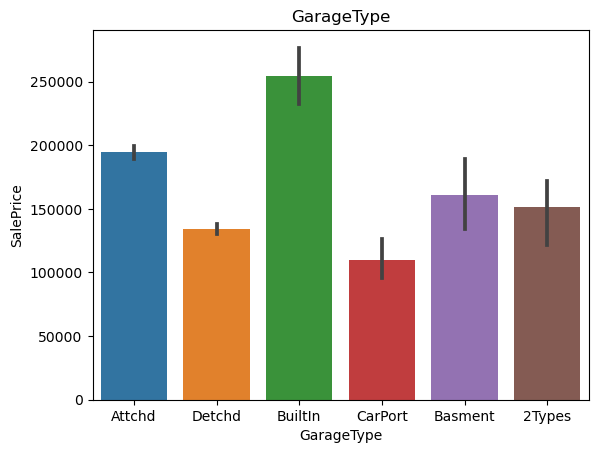

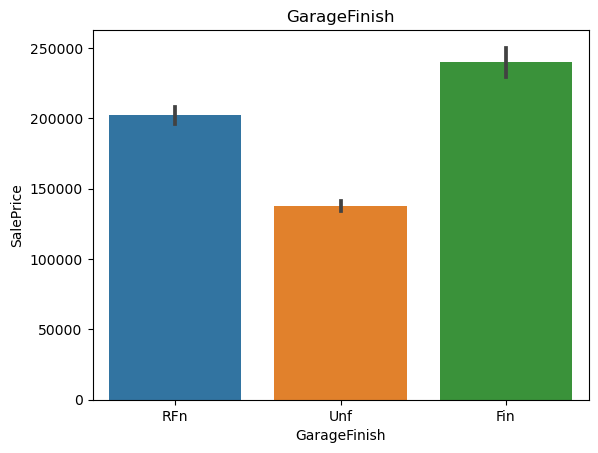

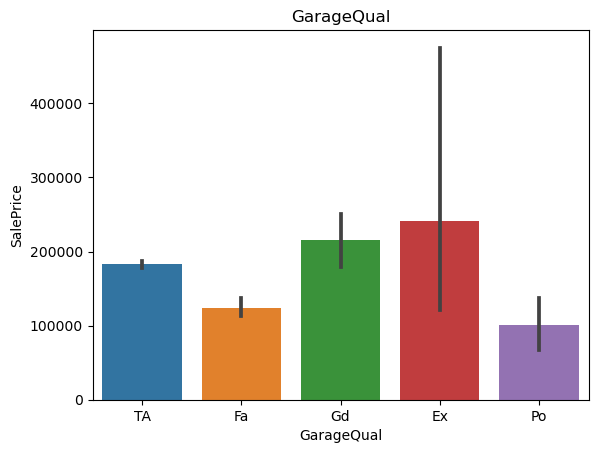

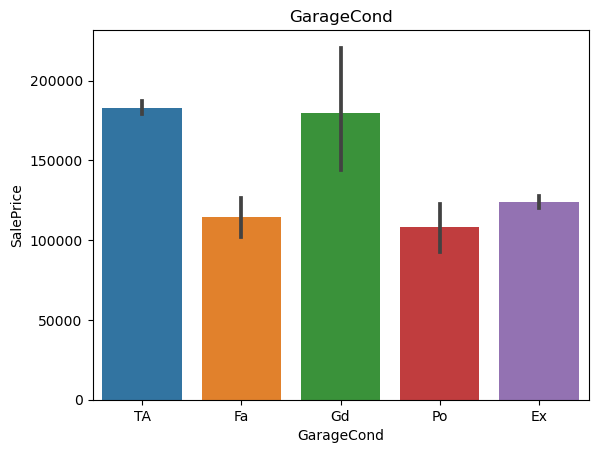

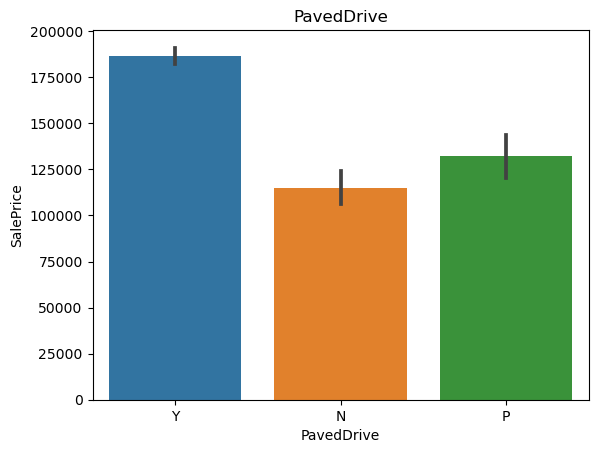

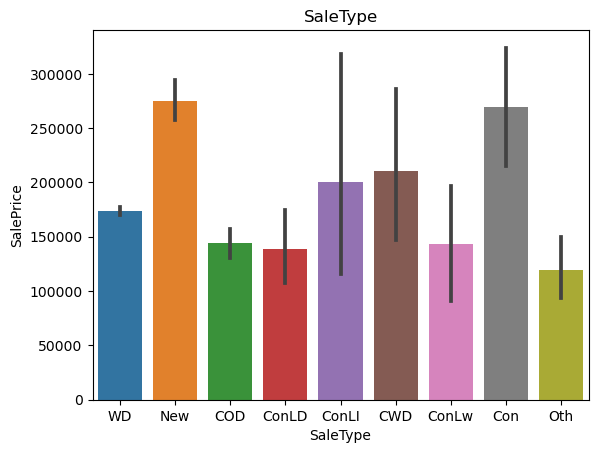

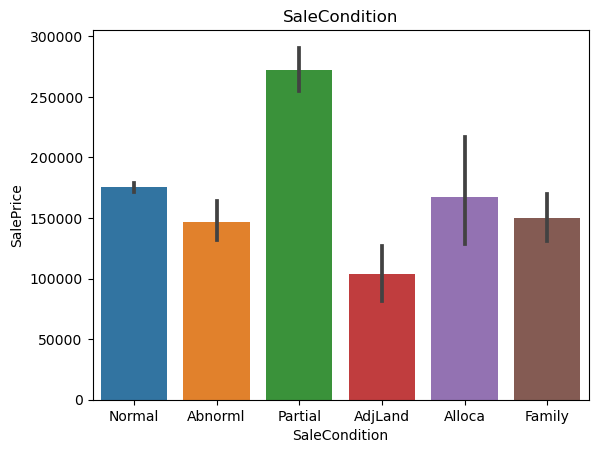

In [40]:
for i in categorical:
    sns.barplot(x = train[i], y = train['SalePrice'])
    plt.xlabel(i)
    plt.ylabel('SalePrice')
    plt.title(i)
    plt.show()

###  Ordinal

In [41]:
from pandas.api.types import CategoricalDtype

In [42]:
ordinal= ["LandContour", "LandSlope", "ExterQual", "ExterCond", "Foundation", "BsmtQual", "BsmtCond", "BsmtExposure",
          "HeatingQC", "Electrical", "KitchenQual", "GarageType", "GarageFinish", "GarageQual", "PavedDrive"]
          

In [43]:
len(ordinal)

15

In [44]:
for i in ordinal:
    Categories = []
    for j in train[i].unique():
        Categories.append(j)
    train[i] = train[i].astype(CategoricalDtype(categories = Categories, ordered = True)).cat.codes

In [45]:
train.shape

(1460, 70)

In [46]:
train.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  LandContour  \
0          60       RL         65.0     8450   Pave      Reg            0   
1          20       RL         80.0     9600   Pave      Reg            0   
2          60       RL         68.0    11250   Pave      IR1            0   
3          70       RL         60.0     9550   Pave      IR1            0   
4          60       RL         84.0    14260   Pave      IR1            0   

  Utilities LotConfig  LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside          0      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2          0      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside          0      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner          0      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2          0      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5          5             5     Gable   
1     1Story            6            8         31            31     Gable   
2     2Story            7            5          7             6     Gable   
3     2Story            7            5         91            36     Gable   
4     2Story            8            5          8             8     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea  ExterQual  \
0  CompShg     VinylSd     VinylSd    BrkFace       196.0          0   
1  CompShg     MetalSd     MetalSd       None         0.0          1   
2  CompShg     VinylSd     VinylSd    BrkFace       162.0          0   
3  CompShg     Wd Sdng     Wd Shng       None         0.0          1   
4  CompShg     VinylSd     VinylSd    BrkFace       350.0          0   

   ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure BsmtFinType1  \
0          0           0         0         0             0          GLQ   
1          0           1         0         0             1          ALQ   
2          0           0         0         0             2          GLQ   
3          0           2         1         1             0          ALQ   
4          0           0         0         0             3          GLQ   

   BsmtFinSF1 BsmtFinType2  BsmtUnfSF  TotalBsmtSF Heating  HeatingQC  \
0         706          Unf        150          856    GasA          0   
1         978          Unf        284         1262    GasA          0   
2         486          Unf        434          920    GasA          0   
3         216          Unf        540          756    GasA          1   
4         655          Unf        490         1145    GasA          0   

  CentralAir  Electrical  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  \
0          Y           0       856       854       1710             1   
1          Y           0      1262         0       1262             0   
2          Y           0       920       866       1786             1   
3          Y           0       961       756       1717             1   
4          Y           0      1145      1053       2198             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  \
0             0         2         1             3             1            0   
1             1         2         0             3             1            1   
2             0         2         1             3             1            0   
3             0         1         0             3             1            0   
4             0         2         1             4             1            0   

   TotRmsAbvGrd Functional  Fireplaces  GarageType  GarageYrBlt  GarageFinish  \
0             8        Typ           0           0          5.0             0   
1             6        Typ           1           0         31.0             0   
2             6        Typ           1           0          7.0             0   
3             7        Typ   

### Nominal 

In [47]:
nominal = [i for i in categorical if i not in ordinal]
len(nominal)

23

In [48]:
for i in nominal:
    print(i, len(train[i].unique()))

MSZoning 5
Street 2
LotShape 4
Utilities 2
LotConfig 5
Neighborhood 25
Condition1 9
Condition2 8
BldgType 5
HouseStyle 8
RoofStyle 6
RoofMatl 8
Exterior1st 15
Exterior2nd 16
MasVnrType 4
BsmtFinType1 6
BsmtFinType2 6
Heating 6
CentralAir 2
Functional 7
GarageCond 5
SaleType 9
SaleCondition 6


In [49]:
nominal_1 = ["Neighborhood", "Exterior1st", "Exterior2nd"]
nominal_2 = [i for i in nominal if i not in nominal_1]

In [50]:
nominal_2

['MSZoning',
 'Street',
 'LotShape',
 'Utilities',
 'LotConfig',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'MasVnrType',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'CentralAir',
 'Functional',
 'GarageCond',
 'SaleType',
 'SaleCondition']

In [51]:
print(len(nominal), len(nominal_1), len(nominal_2))

23 3 20


**One Hot Encoding**

In [52]:
nominal_2_OHE = pd.get_dummies(train[nominal_2], drop_first = True)

In [53]:
nominal_2_OHE.shape

(1460, 93)

In [54]:
nominal_2_OHE.head()

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0            0            0            1            0            1   
1            0            0            1            0            1   
2            0            0            1            0            1   
3            0            0            1            0            1   
4            0            0            1            0            1   

   LotShape_IR2  LotShape_IR3  LotShape_Reg  Utilities_NoSeWa  \
0             0             0             1                 0   
1             0             0             1                 0   
2             0             0             0                 0   
3             0             0             0                 0   
4             0             0             0                 0   

   LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  \
0                  0              0              0                 1   
1                  0              1              0                 0   
2                  0              0              0                 1   
3                  0              0              0                 0   
4                  0              1              0                 0   

   Condition1_Feedr  Condition1_Norm  Condition1_PosA  Condition1_PosN  \
0                 0                1                0                0   
1                 1                0                0                0   
2                 0                1                0                0   
3                 0                1                0                0   
4                 0                1                0                0   

   Condition1_RRAe  Condition1_RRAn  Condition1_RRNe  Condition1_RRNn  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   Condition2_Feedr  Condition2_Norm  Condition2_PosA  Condition2_PosN  \
0                 0                1                0                0   
1                 0                1                0                0   
2                 0                1                0                0   
3                 0                1                0                0   
4                 0                1                0                0   

   Condition2_RRAe  Condition2_RRAn  Condition2_RRNn  BldgType_2fmCon  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   BldgType_Duplex  BldgType_Twnhs  BldgType_TwnhsE  HouseStyle_1.5Unf  \
0                0               0                0                  0   
1                0               0                0                  0   
2                0               0                0                  0   
3                0               0                0                  0   
4                0               0                0                  0   

   HouseStyle_1Story  HouseStyle_2.5Fin  HouseStyle_2.5Unf  HouseStyle_2Story  \
0                  0                  0                  0                  1   
1                  1                  0                  0                  0   
2                  0                  0                  0                  1   
3                  0                  0                  0                  1   
4                  0                  0                  0                  1   

   HouseStyle_SFoyer  HouseStyle_SLvl  RoofStyle_Gable  Ro

**One Hot Encoding with many variable**

In [55]:
def top_ten(feature):
    top_10=[]
    for i in feature.value_counts().sort_values(ascending = False).head(10).index:
        top_10.append(i)
    return top_10

In [56]:
top_ten_Neighborhood = top_ten(train["Neighborhood"])
top_ten_Exterior1st = top_ten(train["Exterior1st"])
top_ten_Exterior2nd = top_ten(train["Exterior2nd"])

In [57]:
top_ten_Neighborhood

['NAmes',
 'CollgCr',
 'OldTown',
 'Edwards',
 'Somerst',
 'Gilbert',
 'NridgHt',
 'Sawyer',
 'NWAmes',
 'SawyerW']

In [58]:
top_ten_Exterior1st

['VinylSd',
 'HdBoard',
 'MetalSd',
 'Wd Sdng',
 'Plywood',
 'CemntBd',
 'BrkFace',
 'WdShing',
 'Stucco',
 'AsbShng']

In [59]:
top_ten_Exterior2nd

['VinylSd',
 'MetalSd',
 'HdBoard',
 'Wd Sdng',
 'Plywood',
 'CmentBd',
 'Wd Shng',
 'Stucco',
 'BrkFace',
 'AsbShng']

In [60]:
for i in top_ten_Neighborhood:
    train[i] = np.where(train["Neighborhood"]== i,1,0)
for i in top_ten_Exterior1st:
    train[i] = np.where(train["Exterior1st"]== i,1,0)

In [61]:
train[top_ten_Exterior1st].head()

VinylSd  HdBoard  MetalSd  Wd Sdng  Plywood  CemntBd  BrkFace  WdShing  \
0        1        0        0        0        0        0        0        0   
1        0        0        1        0        0        0        0        0   
2        1        0        0        0        0        0        0        0   
3        0        0        0        1        0        0        0        0   
4        1        0        0        0        0        0        0        0   

   Stucco  AsbShng  
0       0        0  
1       0        0  
2       0        0  
3       0        0  
4       0        0

In [62]:
train.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  LandContour  \
0          60       RL         65.0     8450   Pave      Reg            0   
1          20       RL         80.0     9600   Pave      Reg            0   
2          60       RL         68.0    11250   Pave      IR1            0   
3          70       RL         60.0     9550   Pave      IR1            0   
4          60       RL         84.0    14260   Pave      IR1            0   

  Utilities LotConfig  LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside          0      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2          0      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside          0      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner          0      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2          0      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5          5             5     Gable   
1     1Story            6            8         31            31     Gable   
2     2Story            7            5          7             6     Gable   
3     2Story            7            5         91            36     Gable   
4     2Story            8            5          8             8     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea  ExterQual  \
0  CompShg     VinylSd     VinylSd    BrkFace       196.0          0   
1  CompShg     MetalSd     MetalSd       None         0.0          1   
2  CompShg     VinylSd     VinylSd    BrkFace       162.0          0   
3  CompShg     Wd Sdng     Wd Shng       None         0.0          1   
4  CompShg     VinylSd     VinylSd    BrkFace       350.0          0   

   ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure BsmtFinType1  \
0          0           0         0         0             0          GLQ   
1          0           1         0         0             1          ALQ   
2          0           0         0         0             2          GLQ   
3          0           2         1         1             0          ALQ   
4          0           0         0         0             3          GLQ   

   BsmtFinSF1 BsmtFinType2  BsmtUnfSF  TotalBsmtSF Heating  HeatingQC  \
0         706          Unf        150          856    GasA          0   
1         978          Unf        284         1262    GasA          0   
2         486          Unf        434          920    GasA          0   
3         216          Unf        540          756    GasA          1   
4         655          Unf        490         1145    GasA          0   

  CentralAir  Electrical  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  \
0          Y           0       856       854       1710             1   
1          Y           0      1262         0       1262             0   
2          Y           0       920       866       1786             1   
3          Y           0       961       756       1717             1   
4          Y           0      1145      1053       2198             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  \
0             0         2         1             3             1            0   
1             1         2         0             3             1            1   
2             0         2         1             3             1            0   
3             0         1         0             3             1            0   
4             0         2         1             4             1            0   

   TotRmsAbvGrd Functional  Fireplaces  GarageType  GarageYrBlt  GarageFinish  \
0             8        Typ           0           0          5.0             0   
1             6        Typ           1           0         31.0             0   
2             6        Typ           1           0          7.0             0   
3             7        Typ   

In [63]:
train.drop(nominal, axis = 1, inplace = True)

In [64]:
train.head()

MSSubClass  LotFrontage  LotArea  LandContour  LandSlope  OverallQual  \
0          60         65.0     8450            0          0            7   
1          20         80.0     9600            0          0            6   
2          60         68.0    11250            0          0            7   
3          70         60.0     9550            0          0            7   
4          60         84.0    14260            0          0            8   

   OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  ExterQual  ExterCond  \
0            5          5             5       196.0          0          0   
1            8         31            31         0.0          1          0   
2            5          7             6       162.0          0          0   
3            5         91            36         0.0          1          0   
4            5          8             8       350.0          0          0   

   Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinSF1  BsmtUnfSF  \
0           0         0         0             0         706        150   
1           1         0         0             1         978        284   
2           0         0         0             2         486        434   
3           2         1         1             0         216        540   
4           0         0         0             3         655        490   

   TotalBsmtSF  HeatingQC  Electrical  1stFlrSF  2ndFlrSF  GrLivArea  \
0          856          0           0       856       854       1710   
1         1262          0           0      1262         0       1262   
2          920          0           0       920       866       1786   
3          756          1           0       961       756       1717   
4         1145          0           0      1145      1053       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

   KitchenQual  TotRmsAbvGrd  Fireplaces  GarageType  GarageYrBlt  \
0            0             8           0           0          5.0   
1            1             6           1           0         31.0   
2            0             6           1           0          7.0   
3            0             7           1           1          8.0   
4            0             9           1           0          8.0   

   GarageFinish  GarageCars  GarageArea  GarageQual  PavedDrive  WoodDeckSF  \
0             0           2         548           0           0           0   
1             0           2         460           0           0         298   
2             0           2         608           0           0           0   
3             1           3         642           0           0           0   
4             0           3         836           0           0         192   

   OpenPorchSF  3SsnPorch  ScreenPorch  PoolArea  MoSold  SalePrice  NAmes  \
0           61          0            0         0       2     208500      0   
1            0          0            0         0       5     181500      0   
2           42          0            0         0       9     223500      0   
3           35          0            0         0       2     140000      0   
4           84          0            0         0      12     250000      0   

   CollgCr  OldTown  Edwards  Somerst  Gilbert  NridgHt  Sawyer  NWAmes  \
0        1        0        0        0        0        0       0       0   
1        0        0        0        0        0        0       0       0   
2        1        0        0        0        0        0       0       0   
3        0        0        0        0        0        0    

In [65]:
train.shape

(1460, 67)

In [66]:
train_new = pd.concat([nominal_2_OHE, train], axis = 1)

In [67]:
train_new.shape

(1460, 160)

In [68]:
train_new.head()

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0            0            0            1            0            1   
1            0            0            1            0            1   
2            0            0            1            0            1   
3            0            0            1            0            1   
4            0            0            1            0            1   

   LotShape_IR2  LotShape_IR3  LotShape_Reg  Utilities_NoSeWa  \
0             0             0             1                 0   
1             0             0             1                 0   
2             0             0             0                 0   
3             0             0             0                 0   
4             0             0             0                 0   

   LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  \
0                  0              0              0                 1   
1                  0              1              0                 0   
2                  0              0              0                 1   
3                  0              0              0                 0   
4                  0              1              0                 0   

   Condition1_Feedr  Condition1_Norm  Condition1_PosA  Condition1_PosN  \
0                 0                1                0                0   
1                 1                0                0                0   
2                 0                1                0                0   
3                 0                1                0                0   
4                 0                1                0                0   

   Condition1_RRAe  Condition1_RRAn  Condition1_RRNe  Condition1_RRNn  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   Condition2_Feedr  Condition2_Norm  Condition2_PosA  Condition2_PosN  \
0                 0                1                0                0   
1                 0                1                0                0   
2                 0                1                0                0   
3                 0                1                0                0   
4                 0                1                0                0   

   Condition2_RRAe  Condition2_RRAn  Condition2_RRNn  BldgType_2fmCon  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   BldgType_Duplex  BldgType_Twnhs  BldgType_TwnhsE  HouseStyle_1.5Unf  \
0                0               0                0                  0   
1                0               0                0                  0   
2                0               0                0                  0   
3                0               0                0                  0   
4                0               0                0                  0   

   HouseStyle_1Story  HouseStyle_2.5Fin  HouseStyle_2.5Unf  HouseStyle_2Story  \
0                  0                  0                  0                  1   
1                  1                  0                  0                  0   
2                  0                  0                  0                  1   
3                  0                  0                  0                  1   
4                  0                  0                  0                  1   

   HouseStyle_SFoyer  HouseStyle_SLvl  RoofStyle_Gable  Ro

In [69]:
train_new.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [70]:
#preview the df
#train =  train.loc[:,~ train.columns.duplicated()]
#train.shape

In [71]:
train_new.isnull().sum().sum()

0

# EDA and Feature Engineering for test data

In [72]:
duplicate_test = test[test.duplicated()]
print(duplicate_test)

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition]
Index: []


In [73]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [74]:
test.describe()

Id   MSSubClass  LotFrontage       LotArea  OverallQual  \
count  1459.000000  1459.000000  1232.000000   1459.000000  1459.000000   
mean   2190.000000    57.378341    68.580357   9819.161069     6.078821   
std     421.321334    42.746880    22.376841   4955.517327     1.436812   
min    1461.000000    20.000000    21.000000   1470.000000     1.000000   
25%    1825.500000    20.000000    58.000000   7391.000000     5.000000   
50%    2190.000000    50.000000    67.000000   9399.000000     6.000000   
75%    2554.500000    70.000000    80.000000  11517.500000     7.000000   
max    2919.000000   190.000000   200.000000  56600.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1459.000000  1459.000000   1459.000000  1444.000000  1458.000000   
mean      5.553804  1971.357779   1983.662783   100.709141   439.203704   
std       1.113740    30.390071     21.130467   177.625900   455.268042   
min       1.000000  1879.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1953.000000   1963.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1992.000000     0.000000   350.500000   
75%       6.000000  2001.000000   2004.000000   164.000000   753.500000   
max       9.000000  2010.000000   2010.000000  1290.000000  4010.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1458.000000  1458.000000  1458.000000  1459.000000  1459.000000   
mean     52.619342   554.294925  1046.117970  1156.534613   325.967786   
std     176.753926   437.260486   442.898624   398.165820   420.610226   
min       0.000000     0.000000     0.000000   407.000000     0.000000   
25%       0.000000   219.250000   784.000000   873.500000     0.000000   
50%       0.000000   460.000000   988.000000  1079.000000     0.000000   
75%       0.000000   797.750000  1305.000000  1382.500000   676.000000   
max    1526.000000  2140.000000  5095.000000  5095.000000  1862.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1459.000000  1459.000000   1457.000000   1457.000000  1459.000000   
mean       3.543523  1486.045922      0.434454      0.065202     1.570939   
std       44.043251   485.566099      0.530648      0.252468     0.555190   
min        0.000000   407.000000      0.000000      0.000000     0.000000   
25%        0.000000  1117.500000      0.000000      0.000000     1.000000   
50%        0.000000  1432.000000      0.000000      0.000000     2.000000   
75%        0.000000  1721.000000      1.000000      0.000000     2.000000   
max     1064.000000  5095.000000      3.000000      2.000000     4.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
count  1459.000000   1459.000000   1459.000000   1459.000000  1459.00000   
mean      0.377656      2.854010      1.042495      6.385195     0.58122   
std       0.503017      0.829788      0.208472      1.508895     0.64742   
min       0.000000      0.000000      0.000000      3.000000     0.00000   
25%       0.000000      2.000000      1.000000      5.000000     0.00000   
50%       0.000000      3.000000      1.000000      6.000000     0.00000   
75%       1.000000      3.000000      1.000000      7.000000     1.00000   
max       2.000000      6.000000      2.000000     15.000000     4.00000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1381.000000  1458.000000  1458.000000  1459.000000  1459.000000   
mean   1977.721217     1.766118   472.768861    93.174777    48.313914   
std      26.431175     0.775945   217.048611   127.744882    68.883364   
min    1895.000000     0.000000     0.000000     0.000000     0.000000   
25%    1959.000000     1.000000   318.000000     0.000000     0.000000   
50%    1979.000000     2.000000   480.000000     0.000000    28.000000   
75%    2002.000000     2.000000   576.000000   168.000000    72.000000   
max    2207.000000     5.0

In [75]:
test.drop("Id", axis=1, inplace= True)

### Handling Numerical missing values

**1.Continuous**

In [76]:
# missing_continuous = []
# for i in test.columns:
#     if test[i].dtype !="object" and len(test[i].unique())>20:
#         missing_continuous.append(i)
missing_continuous

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'MiscVal',
 'SalePrice']

In [77]:
for i in missing_continuous:
    if i != 'SalePrice':
        print(i, round(test[i].isnull().mean(), 3)*100)

LotFrontage 15.6
LotArea 0.0
YearBuilt 0.0
YearRemodAdd 0.0
MasVnrArea 1.0
BsmtFinSF1 0.1
BsmtFinSF2 0.1
BsmtUnfSF 0.1
TotalBsmtSF 0.1
1stFlrSF 0.0
2ndFlrSF 0.0
LowQualFinSF 0.0
GrLivArea 0.0
GarageYrBlt 5.3
GarageArea 0.1
WoodDeckSF 0.0
OpenPorchSF 0.0
EnclosedPorch 0.0
ScreenPorch 0.0
MiscVal 0.0


In [78]:
test["LotFrontage"].fillna(test["LotFrontage"].mean(), inplace= True)
test["MasVnrArea"].fillna(test["MasVnrArea"].median(), inplace= True)
test["GarageYrBlt"].fillna(test["GarageYrBlt"].mean(), inplace= True)
test["GarageArea"].fillna(test["GarageArea"].mean(), inplace= True)
test["TotalBsmtSF"].fillna(test["TotalBsmtSF"].median(), inplace= True)
test["BsmtUnfSF"].fillna(test["BsmtUnfSF"].median(), inplace= True)
test["BsmtFinSF2"].fillna(test["BsmtFinSF2"].median(), inplace= True)
test["BsmtFinSF1"].fillna(test["BsmtFinSF1"].median(), inplace= True)


In [79]:
for i in missing_continuous:
    if i != 'SalePrice':
        print(i, round(test[i].isnull().mean(), 3)*100)

LotFrontage 0.0
LotArea 0.0
YearBuilt 0.0
YearRemodAdd 0.0
MasVnrArea 0.0
BsmtFinSF1 0.0
BsmtFinSF2 0.0
BsmtUnfSF 0.0
TotalBsmtSF 0.0
1stFlrSF 0.0
2ndFlrSF 0.0
LowQualFinSF 0.0
GrLivArea 0.0
GarageYrBlt 0.0
GarageArea 0.0
WoodDeckSF 0.0
OpenPorchSF 0.0
EnclosedPorch 0.0
ScreenPorch 0.0
MiscVal 0.0


**2.Discrete**

In [80]:
# missing_discrete = []
# for i in test.columns:
#     if test[i].dtype !="object" and len(test[i].unique())<=20:
#         missing_discrete.append(i)
len(missing_discrete)

16

In [81]:
for i in missing_discrete:
    print(i, round(test[i].isnull().mean(), 4)*100)

MSSubClass 0.0
OverallQual 0.0
OverallCond 0.0
BsmtFullBath 0.13999999999999999
BsmtHalfBath 0.13999999999999999
FullBath 0.0
HalfBath 0.0
BedroomAbvGr 0.0
KitchenAbvGr 0.0
TotRmsAbvGrd 0.0
Fireplaces 0.0
GarageCars 0.06999999999999999
3SsnPorch 0.0
PoolArea 0.0
MoSold 0.0
YrSold 0.0


In [82]:
for i in missing_discrete:
    test[i].fillna(test[i].mode()[0], inplace = True)

In [83]:
for i in missing_discrete:
    print(i, round(test[i].isnull().mean(), 4)*100)

MSSubClass 0.0
OverallQual 0.0
OverallCond 0.0
BsmtFullBath 0.0
BsmtHalfBath 0.0
FullBath 0.0
HalfBath 0.0
BedroomAbvGr 0.0
KitchenAbvGr 0.0
TotRmsAbvGrd 0.0
Fireplaces 0.0
GarageCars 0.0
3SsnPorch 0.0
PoolArea 0.0
MoSold 0.0
YrSold 0.0


### Handling Categorical Missing values


In [84]:
missing_categorical_test = []
for i in test.columns:
    if test[i].dtype == 'O' and test[i].isnull().sum() > 0:
        missing_categorical_test.append(i)
print(missing_categorical_test)
        

['MSZoning', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType']


In [85]:
for i in missing_categorical_test:
    print(i, round(test[i].isnull().mean(),4)*100)

MSZoning 0.27
Alley 92.67
Utilities 0.13999999999999999
Exterior1st 0.06999999999999999
Exterior2nd 0.06999999999999999
MasVnrType 1.0999999999999999
BsmtQual 3.02
BsmtCond 3.08
BsmtExposure 3.02
BsmtFinType1 2.88
BsmtFinType2 2.88
KitchenQual 0.06999999999999999
Functional 0.13999999999999999
FireplaceQu 50.029999999999994
GarageType 5.21
GarageFinish 5.35
GarageQual 5.35
GarageCond 5.35
PoolQC 99.79
Fence 80.12
MiscFeature 96.5
SaleType 0.06999999999999999


In [86]:
for i in missing_categorical_test:
    if i not in ["Alley", "FireplaceQu", "PoolQC", "Fence", "MiscFeature"]:
        test[i].fillna(test[i].mode()[0], inplace=True)
        print(i, round(test[i].isnull().mean(),4)*100)
    else:
        continue

MSZoning 0.0
Utilities 0.0
Exterior1st 0.0
Exterior2nd 0.0
MasVnrType 0.0
BsmtQual 0.0
BsmtCond 0.0
BsmtExposure 0.0
BsmtFinType1 0.0
BsmtFinType2 0.0
KitchenQual 0.0
Functional 0.0
GarageType 0.0
GarageFinish 0.0
GarageQual 0.0
GarageCond 0.0
SaleType 0.0


In [87]:
test.drop(["Alley", "FireplaceQu", "PoolQC", "Fence", "MiscFeature"],axis = 1, inplace = True)

In [88]:
test.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 74, dtype: int64

### Handling Year Feature
 

In [89]:
year = []
for i in test.columns:
    if "Yr" in i or "Year" in i:
        year.append(i)
year

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [90]:
# test.groupby('YrSold')['SalePrice'].median().plot()
# plt.xlabel('Year Sold')
# plt.ylabel('Median House Price')
# plt.title("House Price vs YearSold")

In [91]:
for i in year:
    test[i] = test['YrSold'] - test[i]

In [92]:
test.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          20       RH         80.0    11622   Pave      Reg         Lvl   
1          20       RL         81.0    14267   Pave      IR1         Lvl   
2          60       RL         74.0    13830   Pave      IR1         Lvl   
3          60       RL         78.0     9978   Pave      IR1         Lvl   
4         120       RL         43.0     5005   Pave      IR1         HLS   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl        NAmes      Feedr       Norm     1Fam   
1    AllPub    Corner       Gtl        NAmes       Norm       Norm     1Fam   
2    AllPub    Inside       Gtl      Gilbert       Norm       Norm     1Fam   
3    AllPub    Inside       Gtl      Gilbert       Norm       Norm     1Fam   
4    AllPub    Inside       Gtl      StoneBr       Norm       Norm   TwnhsE   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     1Story            5            6         49            49     Gable   
1     1Story            6            6         52            52       Hip   
2     2Story            5            5         13            12     Gable   
3     2Story            6            6         12            12     Gable   
4     1Story            8            5         18            18     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd       None         0.0        TA        TA   
1  CompShg     Wd Sdng     Wd Sdng    BrkFace       108.0        TA        TA   
2  CompShg     VinylSd     VinylSd       None         0.0        TA        TA   
3  CompShg     VinylSd     VinylSd    BrkFace        20.0        TA        TA   
4  CompShg     HdBoard     HdBoard       None         0.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0     CBlock       TA       TA           No          Rec       468.0   
1     CBlock       TA       TA           No          ALQ       923.0   
2      PConc       Gd       TA           No          GLQ       791.0   
3      PConc       TA       TA           No          GLQ       602.0   
4      PConc       Gd       TA           No          ALQ       263.0   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          LwQ       144.0      270.0        882.0    GasA        TA   
1          Unf         0.0      406.0       1329.0    GasA        TA   
2          Unf         0.0      137.0        928.0    GasA        Gd   
3          Unf         0.0      324.0        926.0    GasA        Ex   
4          Unf         0.0     1017.0       1280.0    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       896         0             0        896   
1          Y      SBrkr      1329         0             0       1329   
2          Y      SBrkr       928       701             0       1629   
3          Y      SBrkr       926       678             0       1604   
4          Y      SBrkr      1280         0             0       1280   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0           0.0           0.0         1         0             2             1   
1           0.0           0.0         1         1             3             1   
2           0.0           0.0         2         1             3             1   
3           0.0           0.0         2         1             3             1   
4           0.0           0.0         2         0             2             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  GarageYrBlt  \
0          TA             5        Typ           0     Attchd         49.0   
1          Gd             6        Typ           0     Attchd         52.0   
2          TA             6        Typ           1     Attchd         13.0   
3          Gd          

In [93]:
test.drop('YrSold', axis=1, inplace = True)

In [94]:
test.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          20       RH         80.0    11622   Pave      Reg         Lvl   
1          20       RL         81.0    14267   Pave      IR1         Lvl   
2          60       RL         74.0    13830   Pave      IR1         Lvl   
3          60       RL         78.0     9978   Pave      IR1         Lvl   
4         120       RL         43.0     5005   Pave      IR1         HLS   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl        NAmes      Feedr       Norm     1Fam   
1    AllPub    Corner       Gtl        NAmes       Norm       Norm     1Fam   
2    AllPub    Inside       Gtl      Gilbert       Norm       Norm     1Fam   
3    AllPub    Inside       Gtl      Gilbert       Norm       Norm     1Fam   
4    AllPub    Inside       Gtl      StoneBr       Norm       Norm   TwnhsE   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     1Story            5            6         49            49     Gable   
1     1Story            6            6         52            52       Hip   
2     2Story            5            5         13            12     Gable   
3     2Story            6            6         12            12     Gable   
4     1Story            8            5         18            18     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd       None         0.0        TA        TA   
1  CompShg     Wd Sdng     Wd Sdng    BrkFace       108.0        TA        TA   
2  CompShg     VinylSd     VinylSd       None         0.0        TA        TA   
3  CompShg     VinylSd     VinylSd    BrkFace        20.0        TA        TA   
4  CompShg     HdBoard     HdBoard       None         0.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0     CBlock       TA       TA           No          Rec       468.0   
1     CBlock       TA       TA           No          ALQ       923.0   
2      PConc       Gd       TA           No          GLQ       791.0   
3      PConc       TA       TA           No          GLQ       602.0   
4      PConc       Gd       TA           No          ALQ       263.0   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          LwQ       144.0      270.0        882.0    GasA        TA   
1          Unf         0.0      406.0       1329.0    GasA        TA   
2          Unf         0.0      137.0        928.0    GasA        Gd   
3          Unf         0.0      324.0        926.0    GasA        Ex   
4          Unf         0.0     1017.0       1280.0    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       896         0             0        896   
1          Y      SBrkr      1329         0             0       1329   
2          Y      SBrkr       928       701             0       1629   
3          Y      SBrkr       926       678             0       1604   
4          Y      SBrkr      1280         0             0       1280   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0           0.0           0.0         1         0             2             1   
1           0.0           0.0         1         1             3             1   
2           0.0           0.0         2         1             3             1   
3           0.0           0.0         2         1             3             1   
4           0.0           0.0         2         0             2             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  GarageYrBlt  \
0          TA             5        Typ           0     Attchd         49.0   
1          Gd             6        Typ           0     Attchd         52.0   
2          TA             6        Typ           1     Attchd         13.0   
3          Gd          

### Handling Continuous Features

In [95]:
# continuous = []
# for i in test.columns:
#      if test[i].dtype != "O" and len(test[i].unique())>20  and i not in year:
#             continuous.append(i)
continuous         

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'MiscVal',
 'SalePrice']

In [96]:
# for i in continuous:
#     data = test.copy()
#     ax = sns.distplot(data[i])
#     ax.legend(["skewness : {:0.3f}".format(data[i].skew())])
#     plt.xlabel(i)
#     plt.ylabel('SalesPrice')
#     plt.title(i)
#     plt.show() 

In [97]:
# skew=[]
# for i in continuous:
#     if abs(test[i].skew())>1:
#         skew.append(i)
# skew

In [98]:
## Q-Q plot
# import pylab
# import scipy.stats as stat
# for i in skew:
#     if i == 'SalePrice':
#         pass
#     else:
#         data = np.log1p(test[i])
#         plt.subplot(1,2,1)
#         data.hist()
#         plt.subplot(1,2,2)
#         stat.probplot(data,dist='norm',plot=pylab)
#         plt.xlabel(i)
#         plt.title(i)
#         plt.show()

In [99]:
## Correlation map
# plt.figure(figsize=(25,25))
# ax = sns.heatmap(test[continuous].corr(), cmap = "coolwarm", annot=True, linewidth = 2)

In [100]:
# correlation heatmap of higly correlated features with SalePrice
# low_corr = test[continuous].corr()
# low_corr_features = low_corr.index[low_corr["SalePrice"] < 0.10]
# low_corr_features

In [101]:
low_corr_features

Index(['BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch', 'MiscVal'], dtype='object')

In [102]:
test.drop(low_corr_features, axis =1, inplace =True)

In [103]:
test.shape

(1459, 69)

### Handling Categorical Feature 


In [104]:
# categorical = [i for i in test.columns if test[i].dtype=='object']
categorical

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [105]:
len(categorical)

38

In [106]:
# for i in categorical:
#     sns.barplot(x = test[i], y = test['SalePrice'])
#     plt.xlabel(i)
#     plt.ylabel('SalePrice')
#     plt.title(i)
#     plt.show()

###  Ordinal


In [107]:
# from pandas.api.types import CategoricalDtype

In [108]:
# ordinal= ["LandContour", "LandSlope", "ExterQual", "ExterCond", "Foundation", "BsmtQual", "BsmtCond", "BsmtExposure",
#           "HeatingQC", "Electrical", "KitchenQual", "GarageType", "GarageFinish", "GarageQual", "PavedDrive"]
          

In [109]:
len(ordinal)

15

In [110]:
for i in ordinal:
    Categories = []
    for j in test[i].unique():
        Categories.append(j)
    test[i] = test[i].astype(CategoricalDtype(categories = Categories, ordered = True)).cat.codes

In [111]:
test.shape

(1459, 69)

In [112]:
test.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  LandContour  \
0          20       RH         80.0    11622   Pave      Reg            0   
1          20       RL         81.0    14267   Pave      IR1            0   
2          60       RL         74.0    13830   Pave      IR1            0   
3          60       RL         78.0     9978   Pave      IR1            0   
4         120       RL         43.0     5005   Pave      IR1            1   

  Utilities LotConfig  LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside          0        NAmes      Feedr       Norm     1Fam   
1    AllPub    Corner          0        NAmes       Norm       Norm     1Fam   
2    AllPub    Inside          0      Gilbert       Norm       Norm     1Fam   
3    AllPub    Inside          0      Gilbert       Norm       Norm     1Fam   
4    AllPub    Inside          0      StoneBr       Norm       Norm   TwnhsE   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     1Story            5            6         49            49     Gable   
1     1Story            6            6         52            52       Hip   
2     2Story            5            5         13            12     Gable   
3     2Story            6            6         12            12     Gable   
4     1Story            8            5         18            18     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea  ExterQual  \
0  CompShg     VinylSd     VinylSd       None         0.0          0   
1  CompShg     Wd Sdng     Wd Sdng    BrkFace       108.0          0   
2  CompShg     VinylSd     VinylSd       None         0.0          0   
3  CompShg     VinylSd     VinylSd    BrkFace        20.0          0   
4  CompShg     HdBoard     HdBoard       None         0.0          1   

   ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure BsmtFinType1  \
0          0           0         0         0             0          Rec   
1          0           0         0         0             0          ALQ   
2          0           1         1         0             0          GLQ   
3          0           1         0         0             0          GLQ   
4          0           1         1         0             0          ALQ   

   BsmtFinSF1 BsmtFinType2  BsmtUnfSF  TotalBsmtSF Heating  HeatingQC  \
0       468.0          LwQ      270.0        882.0    GasA          0   
1       923.0          Unf      406.0       1329.0    GasA          0   
2       791.0          Unf      137.0        928.0    GasA          1   
3       602.0          Unf      324.0        926.0    GasA          2   
4       263.0          Unf     1017.0       1280.0    GasA          2   

  CentralAir  Electrical  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  \
0          Y           0       896         0        896           0.0   
1          Y           0      1329         0       1329           0.0   
2          Y           0       928       701       1629           0.0   
3          Y           0       926       678       1604           0.0   
4          Y           0      1280         0       1280           0.0   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  \
0           0.0         1         0             2             1            0   
1           0.0         1         1             3             1            1   
2           0.0         2         1             3             1            0   
3           0.0         2         1             3             1            1   
4           0.0         2         0             2             1            1   

   TotRmsAbvGrd Functional  Fireplaces  GarageType  GarageYrBlt  GarageFinish  \
0             5        Typ           0           0         49.0             0   
1             6        Typ           0           0         52.0             0   
2             6        Typ           1           0         13.0             1   
3             7        Typ   

### Nominal 


In [113]:
# nominal = [i for i in categorical if i not in ordinal]
len(nominal)

23

In [114]:
for i in nominal:
    print(i, len(test[i].unique()))

MSZoning 5
Street 2
LotShape 4
Utilities 1
LotConfig 5
Neighborhood 25
Condition1 9
Condition2 5
BldgType 5
HouseStyle 7
RoofStyle 6
RoofMatl 4
Exterior1st 13
Exterior2nd 15
MasVnrType 4
BsmtFinType1 6
BsmtFinType2 6
Heating 4
CentralAir 2
Functional 7
GarageCond 5
SaleType 9
SaleCondition 6


In [115]:
# nominal_1 = ["Neighborhood", "Exterior1st", "Exterior2nd"]
# nominal_2 = [i for i in nominal if i not in nominal_1]
nominal_1

['Neighborhood', 'Exterior1st', 'Exterior2nd']

In [116]:
nominal_2

['MSZoning',
 'Street',
 'LotShape',
 'Utilities',
 'LotConfig',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'MasVnrType',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'CentralAir',
 'Functional',
 'GarageCond',
 'SaleType',
 'SaleCondition']

In [117]:
print(len(nominal), len(nominal_1), len(nominal_2))

23 3 20


**One Hot Encoding**

In [118]:
nominal_2_OHE_test = pd.get_dummies(test[nominal_2], drop_first = True)

In [119]:
nominal_2_OHE_test.shape

(1459, 82)

In [120]:
nominal_2_OHE_test.head()

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0            0            1            0            0            1   
1            0            0            1            0            1   
2            0            0            1            0            1   
3            0            0            1            0            1   
4            0            0            1            0            1   

   LotShape_IR2  LotShape_IR3  LotShape_Reg  LotConfig_CulDSac  LotConfig_FR2  \
0             0             0             1                  0              0   
1             0             0             0                  0              0   
2             0             0             0                  0              0   
3             0             0             0                  0              0   
4             0             0             0                  0              0   

   LotConfig_FR3  LotConfig_Inside  Condition1_Feedr  Condition1_Norm  \
0              0                 1                 1                0   
1              0                 0                 0                1   
2              0                 1                 0                1   
3              0                 1                 0                1   
4              0                 1                 0                1   

   Condition1_PosA  Condition1_PosN  Condition1_RRAe  Condition1_RRAn  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   Condition1_RRNe  Condition1_RRNn  Condition2_Feedr  Condition2_Norm  \
0                0                0                 0                1   
1                0                0                 0                1   
2                0                0                 0                1   
3                0                0                 0                1   
4                0                0                 0                1   

   Condition2_PosA  Condition2_PosN  BldgType_2fmCon  BldgType_Duplex  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   BldgType_Twnhs  BldgType_TwnhsE  HouseStyle_1.5Unf  HouseStyle_1Story  \
0               0                0                  0                  1   
1               0                0                  0                  1   
2               0                0                  0                  0   
3               0                0                  0                  0   
4               0                1                  0                  1   

   HouseStyle_2.5Unf  HouseStyle_2Story  HouseStyle_SFoyer  HouseStyle_SLvl  \
0                  0                  0                  0                0   
1                  0                  0                  0                0   
2                  0                  1                  0                0   
3                  0                  1                  0                0   
4                  0                  0                  0                0   

   RoofStyle_Gable  RoofStyle_Gambrel  RoofStyle_Hip  RoofStyle_Mansard  \
0                1                  0              0                  0   
1                0                  0              1                  0   
2                1                  0              0                  0   
3                1                  0              0                  0   
4                1        

**One Hot Encoding with many variable**

In [121]:
# def top_ten(feature):
#     top_10=[]
#     for i in feature.value_counts().sort_values(ascending = False).head(10).index:
#         top_10.append(i)
#     return top_10

In [122]:
# top_ten_Neighborhood_test = top_ten(test["Neighborhood"])
# top_ten_Exterior1st_test = top_ten(test["Exterior1st"])
# top_ten_Exterior2nd_test = top_ten(test["Exterior2nd"])

In [123]:
# top_ten_Neighborhood_test

In [124]:
top_ten_Neighborhood

['NAmes',
 'CollgCr',
 'OldTown',
 'Edwards',
 'Somerst',
 'Gilbert',
 'NridgHt',
 'Sawyer',
 'NWAmes',
 'SawyerW']

In [125]:
top_ten_Exterior1st

['VinylSd',
 'HdBoard',
 'MetalSd',
 'Wd Sdng',
 'Plywood',
 'CemntBd',
 'BrkFace',
 'WdShing',
 'Stucco',
 'AsbShng']

In [126]:
top_ten_Exterior2nd

['VinylSd',
 'MetalSd',
 'HdBoard',
 'Wd Sdng',
 'Plywood',
 'CmentBd',
 'Wd Shng',
 'Stucco',
 'BrkFace',
 'AsbShng']

In [127]:
for i in top_ten_Neighborhood:
    test[i] = np.where(test["Neighborhood"]== i,1,0)
for i in top_ten_Exterior1st:
    test[i] = np.where(test["Exterior1st"]== i,1,0)
# test[top_ten_Neighborhood] = train[top_ten_Neighborhood]
# test[top_ten_Exterior1st] = train[top_ten_Exterior1st]

In [128]:
test[top_ten_Exterior1st].head()

VinylSd  HdBoard  MetalSd  Wd Sdng  Plywood  CemntBd  BrkFace  WdShing  \
0        1        0        0        0        0        0        0        0   
1        0        0        0        1        0        0        0        0   
2        1        0        0        0        0        0        0        0   
3        1        0        0        0        0        0        0        0   
4        0        1        0        0        0        0        0        0   

   Stucco  AsbShng  
0       0        0  
1       0        0  
2       0        0  
3       0        0  
4       0        0

In [129]:
test[top_ten_Neighborhood].head()

NAmes  CollgCr  OldTown  Edwards  Somerst  Gilbert  NridgHt  Sawyer  \
0      1        0        0        0        0        0        0       0   
1      1        0        0        0        0        0        0       0   
2      0        0        0        0        0        1        0       0   
3      0        0        0        0        0        1        0       0   
4      0        0        0        0        0        0        0       0   

   NWAmes  SawyerW  
0       0        0  
1       0        0  
2       0        0  
3       0        0  
4       0        0

In [130]:
test.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  LandContour  \
0          20       RH         80.0    11622   Pave      Reg            0   
1          20       RL         81.0    14267   Pave      IR1            0   
2          60       RL         74.0    13830   Pave      IR1            0   
3          60       RL         78.0     9978   Pave      IR1            0   
4         120       RL         43.0     5005   Pave      IR1            1   

  Utilities LotConfig  LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside          0        NAmes      Feedr       Norm     1Fam   
1    AllPub    Corner          0        NAmes       Norm       Norm     1Fam   
2    AllPub    Inside          0      Gilbert       Norm       Norm     1Fam   
3    AllPub    Inside          0      Gilbert       Norm       Norm     1Fam   
4    AllPub    Inside          0      StoneBr       Norm       Norm   TwnhsE   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     1Story            5            6         49            49     Gable   
1     1Story            6            6         52            52       Hip   
2     2Story            5            5         13            12     Gable   
3     2Story            6            6         12            12     Gable   
4     1Story            8            5         18            18     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea  ExterQual  \
0  CompShg     VinylSd     VinylSd       None         0.0          0   
1  CompShg     Wd Sdng     Wd Sdng    BrkFace       108.0          0   
2  CompShg     VinylSd     VinylSd       None         0.0          0   
3  CompShg     VinylSd     VinylSd    BrkFace        20.0          0   
4  CompShg     HdBoard     HdBoard       None         0.0          1   

   ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure BsmtFinType1  \
0          0           0         0         0             0          Rec   
1          0           0         0         0             0          ALQ   
2          0           1         1         0             0          GLQ   
3          0           1         0         0             0          GLQ   
4          0           1         1         0             0          ALQ   

   BsmtFinSF1 BsmtFinType2  BsmtUnfSF  TotalBsmtSF Heating  HeatingQC  \
0       468.0          LwQ      270.0        882.0    GasA          0   
1       923.0          Unf      406.0       1329.0    GasA          0   
2       791.0          Unf      137.0        928.0    GasA          1   
3       602.0          Unf      324.0        926.0    GasA          2   
4       263.0          Unf     1017.0       1280.0    GasA          2   

  CentralAir  Electrical  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  \
0          Y           0       896         0        896           0.0   
1          Y           0      1329         0       1329           0.0   
2          Y           0       928       701       1629           0.0   
3          Y           0       926       678       1604           0.0   
4          Y           0      1280         0       1280           0.0   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  \
0           0.0         1         0             2             1            0   
1           0.0         1         1             3             1            1   
2           0.0         2         1             3             1            0   
3           0.0         2         1             3             1            1   
4           0.0         2         0             2             1            1   

   TotRmsAbvGrd Functional  Fireplaces  GarageType  GarageYrBlt  GarageFinish  \
0             5        Typ           0           0         49.0             0   
1             6        Typ           0           0         52.0             0   
2             6        Typ           1           0         13.0             1   
3             7        Typ   

In [131]:
test.drop(nominal, axis = 1, inplace = True)

In [132]:
test.head()

MSSubClass  LotFrontage  LotArea  LandContour  LandSlope  OverallQual  \
0          20         80.0    11622            0          0            5   
1          20         81.0    14267            0          0            6   
2          60         74.0    13830            0          0            5   
3          60         78.0     9978            0          0            6   
4         120         43.0     5005            1          0            8   

   OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  ExterQual  ExterCond  \
0            6         49            49         0.0          0          0   
1            6         52            52       108.0          0          0   
2            5         13            12         0.0          0          0   
3            6         12            12        20.0          0          0   
4            5         18            18         0.0          1          0   

   Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinSF1  BsmtUnfSF  \
0           0         0         0             0       468.0      270.0   
1           0         0         0             0       923.0      406.0   
2           1         1         0             0       791.0      137.0   
3           1         0         0             0       602.0      324.0   
4           1         1         0             0       263.0     1017.0   

   TotalBsmtSF  HeatingQC  Electrical  1stFlrSF  2ndFlrSF  GrLivArea  \
0        882.0          0           0       896         0        896   
1       1329.0          0           0      1329         0       1329   
2        928.0          1           0       928       701       1629   
3        926.0          2           0       926       678       1604   
4       1280.0          2           0      1280         0       1280   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0           0.0           0.0         1         0             2             1   
1           0.0           0.0         1         1             3             1   
2           0.0           0.0         2         1             3             1   
3           0.0           0.0         2         1             3             1   
4           0.0           0.0         2         0             2             1   

   KitchenQual  TotRmsAbvGrd  Fireplaces  GarageType  GarageYrBlt  \
0            0             5           0           0         49.0   
1            1             6           0           0         52.0   
2            0             6           1           0         13.0   
3            1             7           1           0         12.0   
4            1             5           0           0         18.0   

   GarageFinish  GarageCars  GarageArea  GarageQual  PavedDrive  WoodDeckSF  \
0             0         1.0       730.0           0           0         140   
1             0         1.0       312.0           0           0         393   
2             1         2.0       482.0           0           0         212   
3             1         2.0       470.0           0           0         360   
4             2         2.0       506.0           0           0           0   

   OpenPorchSF  3SsnPorch  ScreenPorch  PoolArea  MoSold  NAmes  CollgCr  \
0            0          0          120         0       6      1        0   
1           36          0            0         0       6      1        0   
2           34          0            0         0       3      0        0   
3           36          0            0         0       6      0        0   
4           82          0          144         0       1      0        0   

   OldTown  Edwards  Somerst  Gilbert  NridgHt  Sawyer  NWAmes  SawyerW  \
0        0        0        0        0        0       0       0        0   
1        0        0        0        0        0       0       0        0   
2        0        0        0        1        0       0       0        0   
3        0        0        0        1        0       0       0        0

In [133]:
test.shape

(1459, 66)

In [134]:
test_new = pd.concat([nominal_2_OHE_test, test], axis = 1)

In [135]:
test_new.shape

(1459, 148)

In [136]:
test_new.head()

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0            0            1            0            0            1   
1            0            0            1            0            1   
2            0            0            1            0            1   
3            0            0            1            0            1   
4            0            0            1            0            1   

   LotShape_IR2  LotShape_IR3  LotShape_Reg  LotConfig_CulDSac  LotConfig_FR2  \
0             0             0             1                  0              0   
1             0             0             0                  0              0   
2             0             0             0                  0              0   
3             0             0             0                  0              0   
4             0             0             0                  0              0   

   LotConfig_FR3  LotConfig_Inside  Condition1_Feedr  Condition1_Norm  \
0              0                 1                 1                0   
1              0                 0                 0                1   
2              0                 1                 0                1   
3              0                 1                 0                1   
4              0                 1                 0                1   

   Condition1_PosA  Condition1_PosN  Condition1_RRAe  Condition1_RRAn  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   Condition1_RRNe  Condition1_RRNn  Condition2_Feedr  Condition2_Norm  \
0                0                0                 0                1   
1                0                0                 0                1   
2                0                0                 0                1   
3                0                0                 0                1   
4                0                0                 0                1   

   Condition2_PosA  Condition2_PosN  BldgType_2fmCon  BldgType_Duplex  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   BldgType_Twnhs  BldgType_TwnhsE  HouseStyle_1.5Unf  HouseStyle_1Story  \
0               0                0                  0                  1   
1               0                0                  0                  1   
2               0                0                  0                  0   
3               0                0                  0                  0   
4               0                1                  0                  1   

   HouseStyle_2.5Unf  HouseStyle_2Story  HouseStyle_SFoyer  HouseStyle_SLvl  \
0                  0                  0                  0                0   
1                  0                  0                  0                0   
2                  0                  1                  0                0   
3                  0                  1                  0                0   
4                  0                  0                  0                0   

   RoofStyle_Gable  RoofStyle_Gambrel  RoofStyle_Hip  RoofStyle_Mansard  \
0                1                  0              0                  0   
1                0                  0              1                  0   
2                1                  0              0                  0   
3                1                  0              0                  0   
4                1        

In [137]:
test_new.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [138]:
#preview the df
#train =  train.loc[:,~ train.columns.duplicated()]
#train.shape

In [139]:
test.isnull().sum().sum()

0

# Train Test Split

In [140]:
train_new

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0               0            0            1            0            1   
1               0            0            1            0            1   
2               0            0            1            0            1   
3               0            0            1            0            1   
4               0            0            1            0            1   
...           ...          ...          ...          ...          ...   
1455            0            0            1            0            1   
1456            0            0            1            0            1   
1457            0            0            1            0            1   
1458            0            0            1            0            1   
1459            0            0            1            0            1   

      LotShape_IR2  LotShape_IR3  LotShape_Reg  Utilities_NoSeWa  \
0                0             0             1                 0   
1                0             0             1                 0   
2                0             0             0                 0   
3                0             0             0                 0   
4                0             0             0                 0   
...            ...           ...           ...               ...   
1455             0             0             1                 0   
1456             0             0             1                 0   
1457             0             0             1                 0   
1458             0             0             1                 0   
1459             0             0             1                 0   

      LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  \
0                     0              0              0                 1   
1                     0              1              0                 0   
2                     0              0              0                 1   
3                     0              0              0                 0   
4                     0              1              0                 0   
...                 ...            ...            ...               ...   
1455                  0              0              0                 1   
1456                  0              0              0                 1   
1457                  0              0              0                 1   
1458                  0              0              0                 1   
1459                  0              0              0                 1   

      Condition1_Feedr  Condition1_Norm  Condition1_PosA  Condition1_PosN  \
0                    0                1                0                0   
1                    1                0                0                0   
2                    0                1                0                0   
3                    0                1                0                0   
4                    0                1                0                0   
...                ...              ...              ...              ...   
1455                 0                1                0                0   
1456                 0                1                0                0   
1457                 0                1                0                0   
1458                 0                1                0                0   
1459                 0                1                0                0   

      Condition1_RRAe  Condition1_RRAn  Condition1_RRNe  Condition1_RRNn  \
0                   0                0                0                0   
1                   0                0                0                0   
2                   0                0                0                0   
3                   0                0                0                0   
4                   0                0                0                0   
...               ...         

In [141]:
test_new

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0               0            1            0            0            1   
1               0            0            1            0            1   
2               0            0            1            0            1   
3               0            0            1            0            1   
4               0            0            1            0            1   
...           ...          ...          ...          ...          ...   
1454            0            0            0            1            1   
1455            0            0            0            1            1   
1456            0            0            1            0            1   
1457            0            0            1            0            1   
1458            0            0            1            0            1   

      LotShape_IR2  LotShape_IR3  LotShape_Reg  LotConfig_CulDSac  \
0                0             0             1                  0   
1                0             0             0                  0   
2                0             0             0                  0   
3                0             0             0                  0   
4                0             0             0                  0   
...            ...           ...           ...                ...   
1454             0             0             1                  0   
1455             0             0             1                  0   
1456             0             0             1                  0   
1457             0             0             1                  0   
1458             0             0             1                  0   

      LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  Condition1_Feedr  \
0                 0              0                 1                 1   
1                 0              0                 0                 0   
2                 0              0                 1                 0   
3                 0              0                 1                 0   
4                 0              0                 1                 0   
...             ...            ...               ...               ...   
1454              0              0                 1                 0   
1455              0              0                 1                 0   
1456              0              0                 1                 0   
1457              0              0                 1                 0   
1458              0              0                 1                 0   

      Condition1_Norm  Condition1_PosA  Condition1_PosN  Condition1_RRAe  \
0                   0                0                0                0   
1                   1                0                0                0   
2                   1                0                0                0   
3                   1                0                0                0   
4                   1                0                0                0   
...               ...              ...              ...              ...   
1454                1                0                0                0   
1455                1                0                0                0   
1456                1                0                0                0   
1457                1                0                0                0   
1458                1                0                0                0   

      Condition1_RRAn  Condition1_RRNe  Condition1_RRNn  Condition2_Feedr  \
0                   0                0                0                 0   
1                   0                0                0                 0   
2                   0                0                0                 0   
3                   0                0                0                 0   
4                   0                0                0                 0   
...               ...              .

In [142]:
x = train_new.drop("SalePrice", axis=1)
y = train_new["SalePrice"]

In [143]:
x.shape

(1460, 159)

In [145]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

# Feature Selection

In [146]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [147]:
print(model.feature_importances_)

[2.43167263e-04 4.73597890e-05 3.57783566e-03 4.27310333e-03
 4.51688012e-05 1.92690259e-03 2.83432542e-04 2.65061778e-03
 4.46977245e-06 1.52830827e-03 3.49618051e-04 5.70684262e-05
 1.84583877e-03 5.23536151e-04 8.75362804e-04 8.27002947e-05
 5.10867861e-04 9.51273889e-05 8.22740750e-05 3.17651920e-06
 1.77083850e-05 1.96925173e-05 1.87359778e-04 5.87121306e-05
 3.08293093e-04 5.55696627e-06 2.09399916e-06 8.45609993e-07
 5.89511441e-05 2.23457034e-04 2.15977101e-04 4.86454478e-04
 8.05539399e-05 8.93702446e-04 5.90129370e-05 3.97060606e-05
 1.48022717e-03 3.95082295e-05 1.92560160e-04 1.27328675e-03
 1.87225692e-04 1.09240775e-03 2.44726366e-06 1.33439416e-05
 4.64554661e-04 3.85328208e-05 1.74704376e-05 3.51652315e-07
 2.33219393e-04 1.47345870e-05 8.26402270e-04 1.15976609e-03
 1.06710978e-03 1.78267981e-03 3.55913672e-04 2.46162882e-03
 5.28135426e-04 3.21838198e-04 3.51032918e-03 2.78797779e-04
 2.26127395e-04 1.12608091e-04 2.30652809e-04 8.30829945e-04
 1.61939458e-04 1.060092

In [148]:
x.columns

Index(['MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'Street_Pave', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg',
       'Utilities_NoSeWa', 'LotConfig_CulDSac',
       ...
       'VinylSd', 'HdBoard', 'MetalSd', 'Wd Sdng', 'Plywood', 'CemntBd',
       'BrkFace', 'WdShing', 'Stucco', 'AsbShng'],
      dtype='object', length=159)

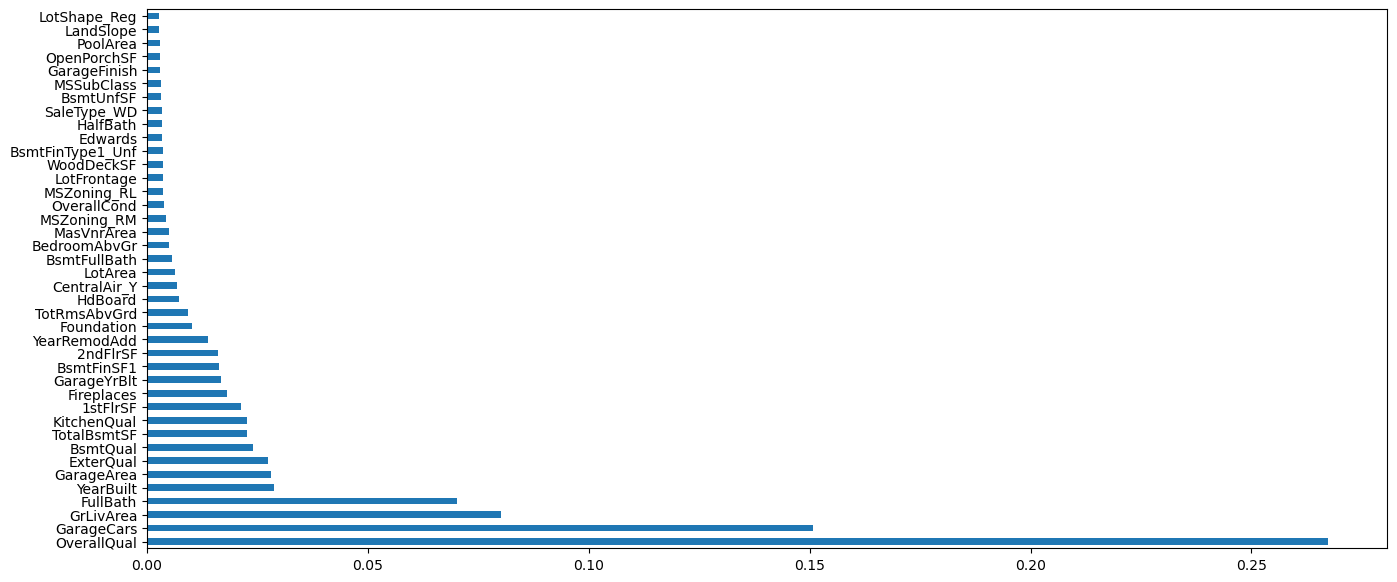

In [150]:
plt.figure(figsize = (16 , 7))
ranked_features =  pd.Series(model.feature_importances_, index = x.columns)
ranked_features.nlargest(40).plot(kind='barh')
plt.show()

In [151]:
features = ranked_features.nlargest(23)

In [152]:
features.index

Index(['OverallQual', 'GarageCars', 'GrLivArea', 'FullBath', 'YearBuilt',
       'GarageArea', 'ExterQual', 'BsmtQual', 'TotalBsmtSF', 'KitchenQual',
       '1stFlrSF', 'Fireplaces', 'GarageYrBlt', 'BsmtFinSF1', '2ndFlrSF',
       'YearRemodAdd', 'Foundation', 'TotRmsAbvGrd', 'HdBoard', 'CentralAir_Y',
       'LotArea', 'BsmtFullBath', 'BedroomAbvGr'],
      dtype='object')

In [153]:
x = train_new[features.index]

In [154]:
x.shape

(1460, 23)

In [155]:
x.head()

OverallQual  GarageCars  GrLivArea  FullBath  YearBuilt  GarageArea  \
0            7           2       1710         2          5         548   
1            6           2       1262         2         31         460   
2            7           2       1786         2          7         608   
3            7           3       1717         1         91         642   
4            8           3       2198         2          8         836   

   ExterQual  BsmtQual  TotalBsmtSF  KitchenQual  1stFlrSF  Fireplaces  \
0          0         0          856            0       856           0   
1          1         0         1262            1      1262           1   
2          0         0          920            0       920           1   
3          1         1          756            0       961           1   
4          0         0         1145            0      1145           1   

   GarageYrBlt  BsmtFinSF1  2ndFlrSF  YearRemodAdd  Foundation  TotRmsAbvGrd  \
0          5.0         706       854             5           0             8   
1         31.0         978         0            31           1             6   
2          7.0         486       866             6           0             6   
3          8.0         216       756            36           2             7   
4          8.0         655      1053             8           0             9   

   HdBoard  CentralAir_Y  LotArea  BsmtFullBath  BedroomAbvGr  
0        0             1     8450             1             3  
1        0             1     9600             0             3  
2        0             1    11250             1             3  
3        0             1     9550             1             3  
4        0             1    14260             1             4

## Model Building 

In [156]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 5)

### Random Forest 

In [157]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)

score_rf = r2_score(y_test, y_pred_rf)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print(f"value of R^2 : {score_rf}")
print(f"value of rmse : {rmse}")

value of R^2 : 0.8962838648051943
value of rmse : 25944.525468574542


In [158]:
from sklearn.model_selection import cross_val_score
cross_validation = cross_val_score(estimator = rf, X = x_train, y = y_train, cv = 10)
print("Cross validation accuracy of random forest model = ", cross_validation)
print("\nCross validation mean accuracy of random forest model = ", cross_validation.mean())

Cross validation accuracy of random forest model =  [0.58463722 0.83740853 0.71848699 0.89258645 0.85860849 0.90769259
 0.89340467 0.78809806 0.85589882 0.88607421]

Cross validation mean accuracy of random forest model =  0.8222896031727178


### Xgboost 

In [160]:
! pip install xgboost

                                              0.0/99.8 MB ? eta -:--:--
                                             0.0/99.8 MB 960.0 kB/s eta 0:01:44
                                              0.1/99.8 MB 1.3 MB/s eta 0:01:16
                                              0.1/99.8 MB 1.2 MB/s eta 0:01:24
                                              0.2/99.8 MB 1.5 MB/s eta 0:01:07
                                              0.2/99.8 MB 1.5 MB/s eta 0:01:07
                                              0.4/99.8 MB 1.5 MB/s eta 0:01:08
                                              0.4/99.8 MB 1.2 MB/s eta 0:01:20
                                              0.4/99.8 MB 1.2 MB/s eta 0:01:20
                                              0.5/99.8 MB 1.3 MB/s eta 0:01:19
                                              0.6/99.8 MB 1.2 MB/s eta 0:01:21
                                              0.6/99.8 MB 1.2 MB/s eta 0:01:24
                                              0.6/99.8 MB 

     -----------------------------          78.0/99.8 MB 269.9 kB/s eta 0:01:21
     -----------------------------          78.0/99.8 MB 269.9 kB/s eta 0:01:21
     -----------------------------          78.0/99.8 MB 269.6 kB/s eta 0:01:21
     -----------------------------          78.0/99.8 MB 269.6 kB/s eta 0:01:21
     -----------------------------          78.0/99.8 MB 269.6 kB/s eta 0:01:21
     -----------------------------          78.0/99.8 MB 269.6 kB/s eta 0:01:21
     -----------------------------          78.0/99.8 MB 270.2 kB/s eta 0:01:21
     -----------------------------          78.0/99.8 MB 270.2 kB/s eta 0:01:21
     -----------------------------          78.0/99.8 MB 269.7 kB/s eta 0:01:21
     -----------------------------          78.0/99.8 MB 269.7 kB/s eta 0:01:21
     -----------------------------          78.1/99.8 MB 270.4 kB/s eta 0:01:21
     -----------------------------          78.1/99.8 MB 270.6 kB/s eta 0:01:21
     -----------------------------      

In [161]:
import xgboost
xgb_model = xgboost.XGBRegressor()
xgb_model.fit(x_train,y_train)


y_pred_xg = xgb_model.predict(x_test)
score_xg=r2_score(y_test,y_pred_xg)
rmse = np.sqrt(mean_squared_error(y_test , y_pred_xg))


print(f"value of R^2 is {score_xg}")
print(f"rmse value is {rmse}")

value of R^2 is 0.8866539968713941
rmse value is 27122.247477356286


In [163]:
# from sklearn.model_selection import cross_val_score
cross_validation = cross_val_score(estimator = xgb_model, X = x_train,y = y_train, cv = 10)
print("Cross validation accuracy of xgboost model = ", cross_validation)
print("\nCross validation mean accuracy of xgboost model = ", cross_validation.mean())

Cross validation accuracy of xgboost model =  [0.50601312 0.85367045 0.82226811 0.88767142 0.88980109 0.91571806
 0.91037362 0.76477311 0.87947811 0.88110841]

Cross validation mean accuracy of xgboost model =  0.8310875488140038


In [186]:
y_pred_xgb_sub = xgb_model.predict(test1)

In [187]:
y_pred_xgb_sub

array([119170.24, 163552.83, 188499.94, ..., 182649.72, 102786.53,
       224396.84], dtype=float32)

In [184]:
df = pd.read_csv("test.csv", usecols = ["Id"])

In [185]:
df.head()

Id
0  1461
1  1462
2  1463
3  1464
4  1465

In [195]:
submit_test1 = pd.concat([df["Id"], pd.DataFrame(y_pred_hyper)], axis=1)
submit_test1.columns=['Id', 'SalePrice']

In [196]:
submit_test1.info

<bound method DataFrame.info of         Id      SalePrice
0     1461  131718.437600
1     1462  155666.373666
2     1463  181828.981107
3     1464  182661.588377
4     1465  182581.928074
...    ...            ...
1454  2915   94712.021031
1455  2916  100160.642093
1456  2917  178726.262487
1457  2918  117152.641158
1458  2919  237659.444810

[1459 rows x 2 columns]>

In [197]:
submit_test1.to_csv("my_sample_submission.csv", index=False)

### Hyper parameter tuning with Random Forest

In [165]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [166]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt', "log2"]
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [167]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [169]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 5, verbose=2, n_jobs = -1 , random_state = 5)

In [170]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=5, verbose=2)

In [171]:
rf_random.best_params_

{'n_estimators': 300,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 15}

In [173]:
prediction = rf_random.predict(x_test)
score_rf=r2_score(y_test,prediction)


print(f"value of R^2 is {score_rf}")
print('RMSE:', np.sqrt(mean_squared_error(y_test, prediction)))

value of R^2 is 0.8881157648529308
RMSE: 26946.78875816653


In [175]:
test1 = test_new[features.index]

In [176]:
test1.shape

(1459, 23)

In [177]:
y_pred_hyper = rf_random.predict(test1)
y_pred_hyper

array([131718.43760046, 155666.37366558, 181828.98110729, ...,
       178726.26248725, 117152.64115785, 237659.44481013])

### Hyper parameter tuning with Xgboost 

In [178]:
params = {
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [179]:
xgb = RandomizedSearchCV(xgb_model,param_distributions=params,n_iter=10,scoring='r2',n_jobs=-1,cv=5,verbose=3)

In [181]:
xgb.fit(_train , y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='r2', verbose=3)

In [182]:
prediction = xgb.predict(x_test)
score_rf=r2_score(y_test, prediction)


print(f"value of R^2 is {score_rf}")
print('RMSE:', np.sqrt(mean_squared_error(y_test, prediction)))

value of R^2 is 0.8972000582634586
RMSE: 25829.67867008487


In [183]:
y_pred = xgb.predict(test1)
y_pred

array([139502.7  , 163075.67 , 177113.1  , ..., 198452.31 , 126964.164,
       231843.78 ], dtype=float32)